In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
exp_results_path = pathlib.Path('./results')
img_path = pathlib.Path('./img')

In [3]:
exp1_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'all',
    'top-1',
    'num',
    'missing_labels',
    'timestamp'
]
exp2_names = exp1_names
exp3_names = exp1_names

exp4_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'all',
    'top-1',
    'num',
    'missing_labels',
    'round',
    'timestamp'
]

exp5_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'seed',
    'aggregation_alg',
    'protection',
    'index_privacy_r',
    'execution_time',
    'timestamp'
]

exp6_names = [
    'dataset',
    'epochs',
    'frac',
    'num_users',
    'num_of_label_k',
    'random_num_label',
    'model',
    'alpha',
    'attack',
    'fixed_inference_number',
    'single_model',
    'attacker_batch_size',
    'seed',
    'protection',
    'index_privacy_r',
    'dp',
    'epsilon',
    'delta',
    'all',
    'top-1',
    'missing_labels',
    'num',
    'timestamp'
]

exp7_names = [
    'algorithm',
    'num_of_parameters',
    'num_of_sparse_parameters',
    'num_of_clients',
    'load',
    'decryption',
    'aggregation',
    'total',
]

nn_color = 'red'
nn_single_color = 'green'
clustering_color = 'blue'

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')

legends = {
    'nn-all': r"$\mathtt{NN}$ $\mathit{all}$",
    'nn-single-all': r"$\mathtt{NN-single}$ $\mathit{all}$",
    'clustering-all': r"$\mathtt{Jac}$ $\mathit{all}$",
    'nn-top-1': r"$\mathtt{NN}$ $\mathit{top-1}$",
    'nn-single-top-1': r"$\mathtt{NN-single}$ $\mathit{top-1}$",
    'clustering-top-1': r"$\mathtt{Jac}$ $\mathit{top-1}$",
}

## exp1
- attack success rate for each dataset and global model
    - evaluation metrics: all and top-1
- fixed number of label

In [4]:
exp1 = pd.read_csv(exp_results_path / 'exp1.csv', header=None, names=exp1_names, index_col=None)
exp1

dataset  epochs  frac  num_users  num_of_label_k  random_num_label  \
0          mnist       3   0.3        100               1             False   
1          mnist       3   0.3        100               1             False   
2          mnist       3   0.3        100               1             False   
3          mnist       3   0.3        100               2             False   
4          mnist       3   0.3        100               2             False   
..           ...     ...   ...        ...             ...               ...   
106     cifar100       3   0.3        100               8             False   
107     cifar100       3   0.3        100              16             False   
108     cifar100       3   0.3        100              16             False   
109     cifar100       3   0.3        100              16             False   
110  purchase100       3   0.3        100               1             False   

    model  alpha      attack  fixed_inference_number  single_model  \
0     mlp    0.1          nn                       1         False   
1     mlp    0.1          nn                       1          True   
2     mlp    0.1  clustering                       1         False   
3     mlp    0.1          nn                       2         False   
4     mlp    0.1          nn                       2          True   
..    ...    ...         ...                     ...           ...   
106   cnn    0.1  clustering                       8         False   
107   cnn    0.1          nn                      16         False   
108   cnn    0.1          nn                      16          True   
109   cnn    0.1  clustering                      16         False   
110   mlp    0.1          nn                       1         False   

     attacker_batch_size  seed       all     top-1  num  missing_labels  \
0                   32.0     0  1.000000  1.000000   66               0   
1                   32.0     0  1.000000  1.000000   66               0   
2                    NaN     0  1.000000  1.000000   66               0   
3                   32.0     0  0.985294  1.000000   68               0   
4                   32.0     0  0.970588  1.000000   68               0   
..                   ...   ...       ...       ...  ...             ...   
106                  NaN     0  0.000000  0.257576   66              18   
107                 32.0     0  0.000000  0.590909   66              19   
108                 32.0     0  0.000000  0.439394   66              19   
109                  NaN     0  0.000000  0.484848   66              19   
110                 32.0     0  1.000000  1.000000   64               0   

          timestamp  
0    20220126112006  
1    20220126112622  
2    20220126112630  
3    20220126112938  
4    20220126113553  
..              ...  
106  20220127155605  
107  20220127172310  
108  20220127185821  
109  20220127194617  
110  20220131221346  

[111 rows x 18 columns]

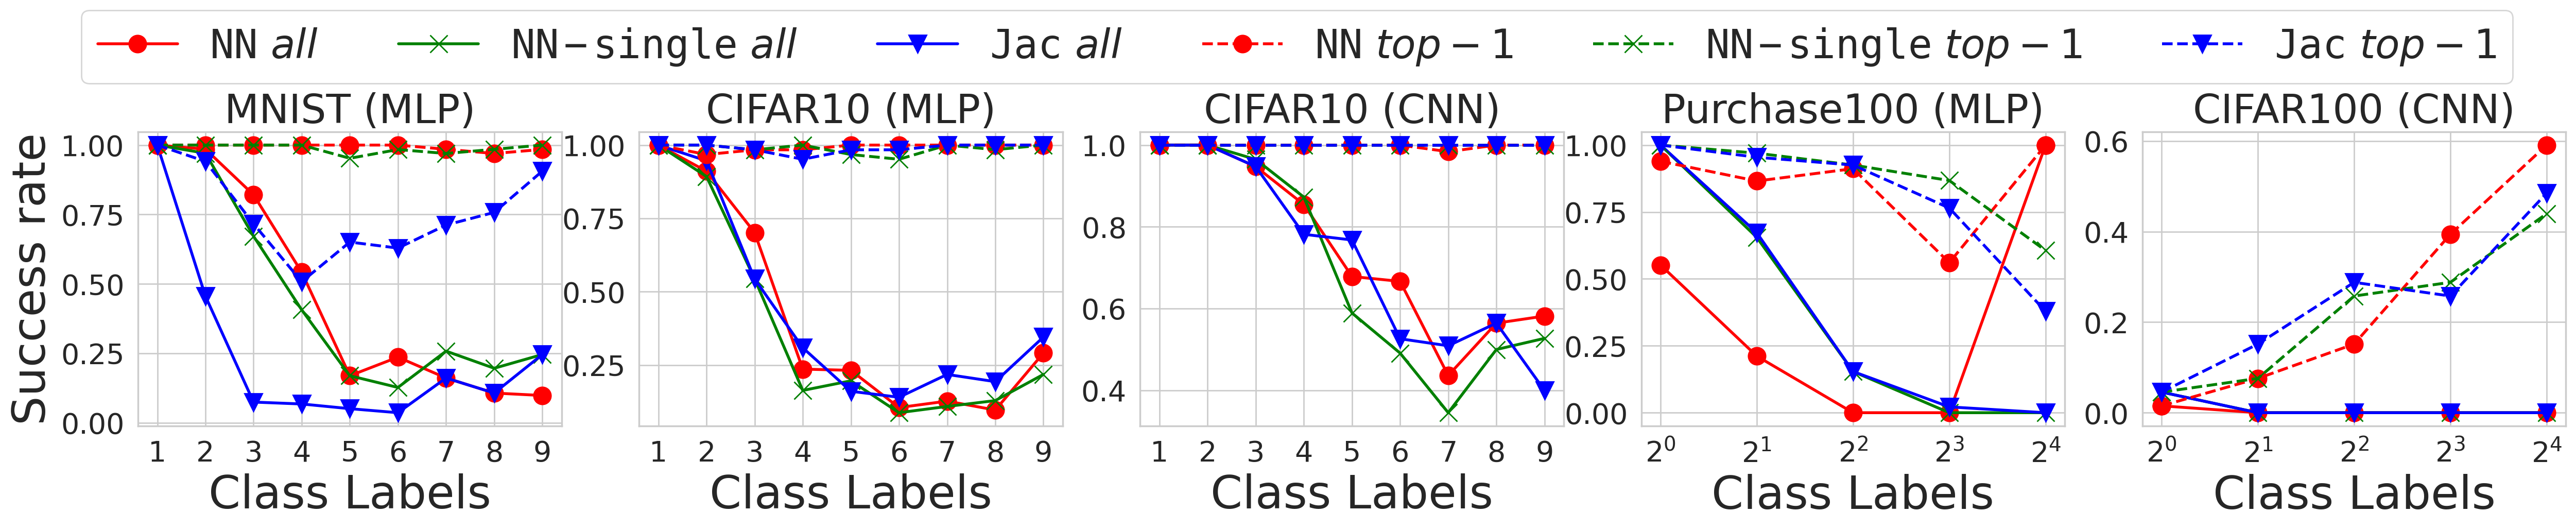

In [46]:
fig = plt.figure(dpi=200, figsize=(25, 4.5))

ax1 = fig.add_subplot(1, 5, 1)
exp1_minist = exp1[exp1['dataset'] == 'mnist']
x = exp1_minist['num_of_label_k'].unique()
nn_total = exp1_minist[exp1_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_minist[exp1_minist['attack'] == 'clustering']

ax1.set_title("MNIST (MLP)", fontsize=28)
ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=32)
ax1.set_xlabel("Class Labels", fontsize=32)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xticks(x)

handles, labels = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(1, 5, 2)
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_mlp = exp1_cifar10[exp1_cifar10['model'] == 'mlp']
x = exp1_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'clustering']

ax2.set_title("CIFAR10 (MLP)", fontsize=28)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Class Labels", fontsize=32)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xticks(x)


ax3 = fig.add_subplot(1, 5, 3)
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_cnn = exp1_cifar10[exp1_cifar10['model'] == 'cnn']
x = exp1_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'clustering']

ax3.set_title("CIFAR10 (CNN)", fontsize=28)

ax3.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax3.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax3.legend().remove()
ax3.set_ylabel("", fontsize=0)
ax3.set_xlabel("Class Labels", fontsize=32)

ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xticks(x)


ax4 = fig.add_subplot(1, 5, 4)
exp1_purchase100 = exp1[exp1['dataset'] == 'purchase100']
exp1_purchase100_mlp = exp1_purchase100[exp1_purchase100['model'] == 'mlp']
x = exp1_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'clustering']

ax4.set_title("Purchase100 (MLP)", fontsize=28)

ax4.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax4.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax4.legend().remove()
ax4.set_ylabel("", fontsize=0)
ax4.set_xlabel("Class Labels", fontsize=32)
ax4.set_xscale('log', base=2)

ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_xticks(x)

ax5 = fig.add_subplot(1, 5, 5)
exp1_cifar100 = exp1[exp1['dataset'] == 'cifar100']
exp1_cifar100_cnn = exp1_cifar100[exp1_cifar100['model'] == 'cnn']
x = exp1_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'clustering']

ax5.set_title("CIFAR100 (CNN)", fontsize=28)

ax5.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax5.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax5.legend().remove()
ax5.set_ylabel("", fontsize=0)
ax5.set_xlabel("Class Labels", fontsize=32)
ax5.set_xscale('log', base=2)

ax5.tick_params(axis='x', labelsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.set_xticks(x)

fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.18), fontsize=28)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-all-fix.png", bbox_inches = "tight")

27


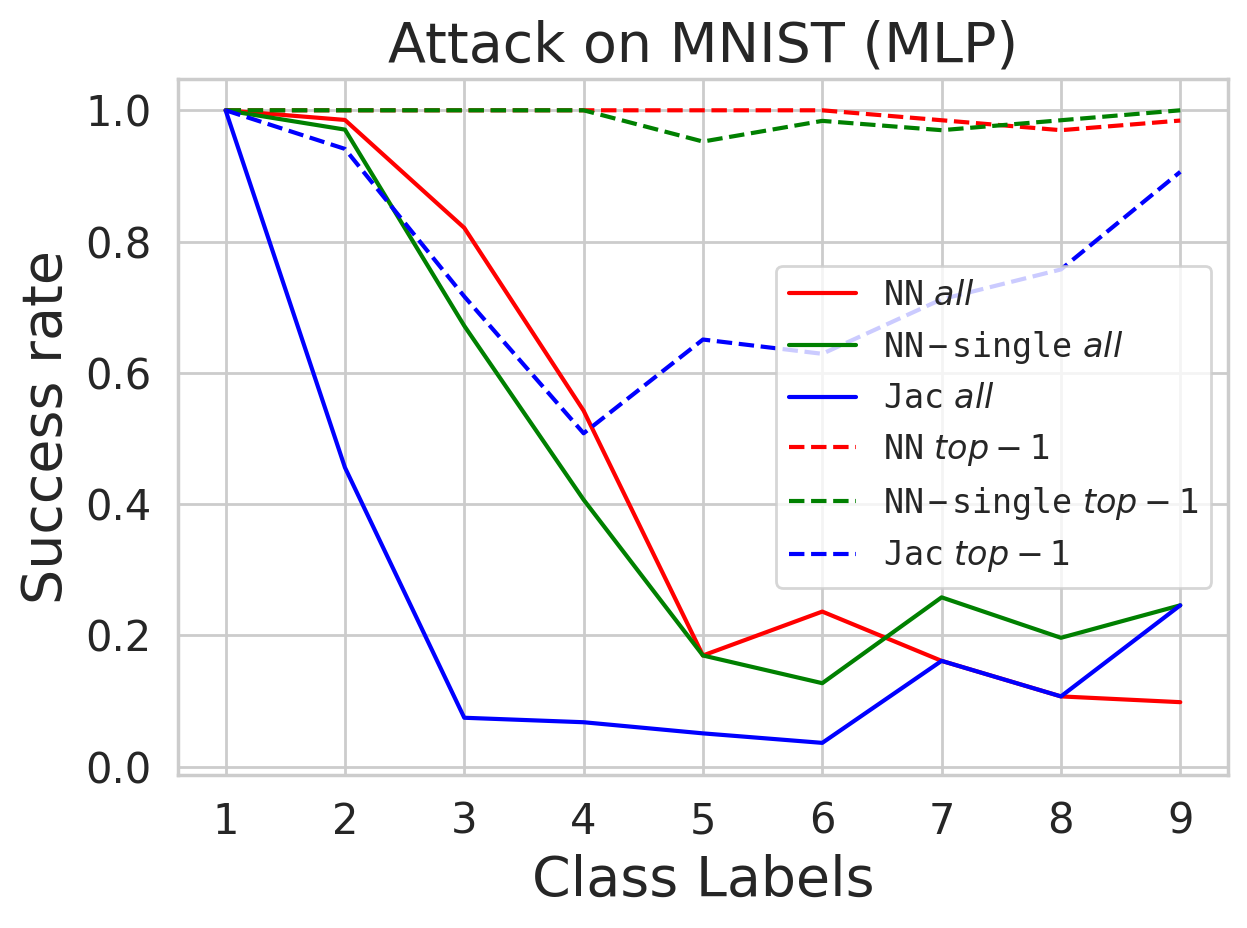

In [5]:
exp1_minist = exp1[exp1['dataset'] == 'mnist']
print(len(exp1_minist))
x = exp1_minist['num_of_label_k'].unique()
nn_total = exp1_minist[exp1_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_minist[exp1_minist['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-MNIST-mlp.png")

27


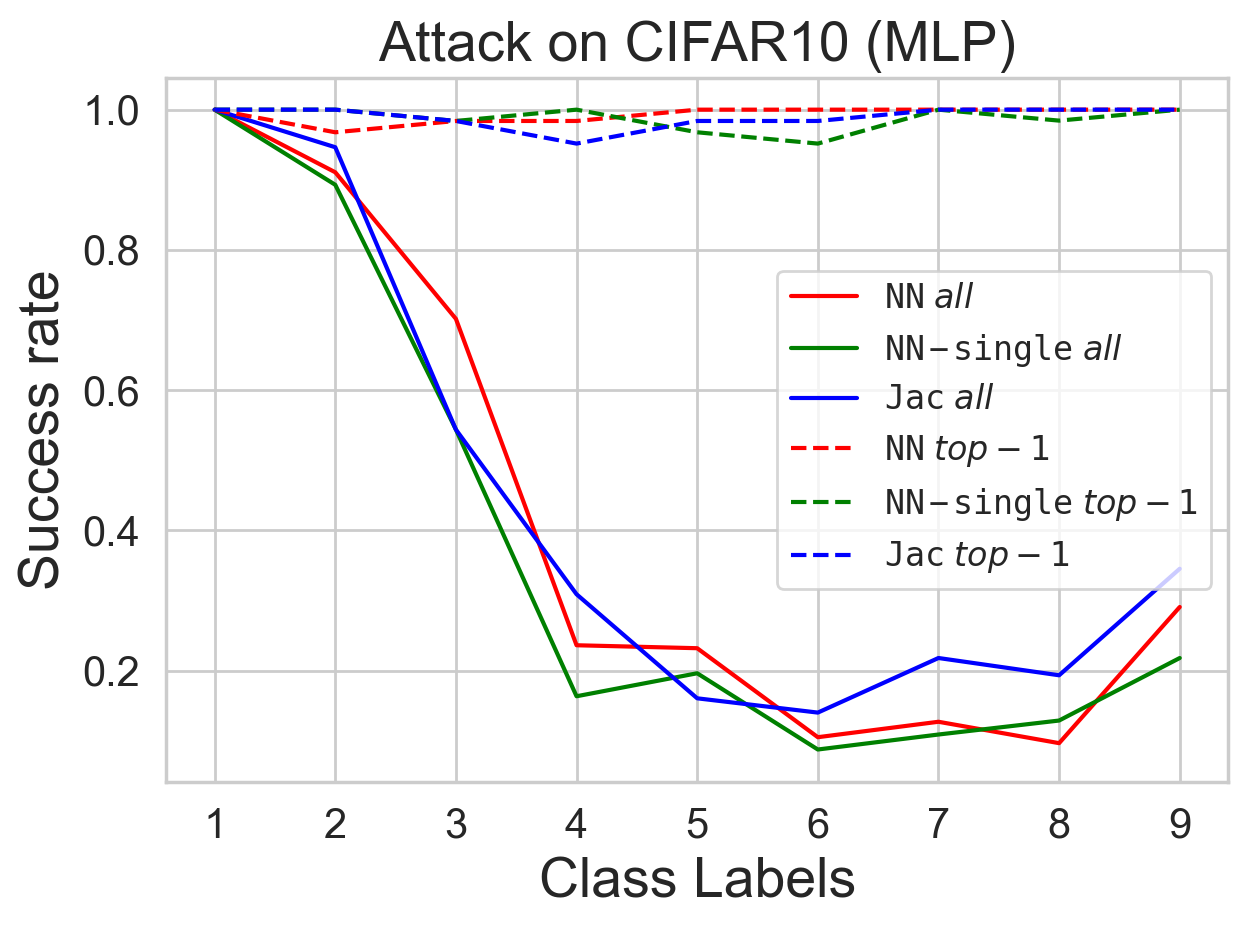

In [5]:
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_mlp = exp1_cifar10[exp1_cifar10['model'] == 'mlp']
print(len(exp1_cifar10_mlp))
x = exp1_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_mlp[exp1_cifar10_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR10 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-CIFAR10-mlp.png")

27


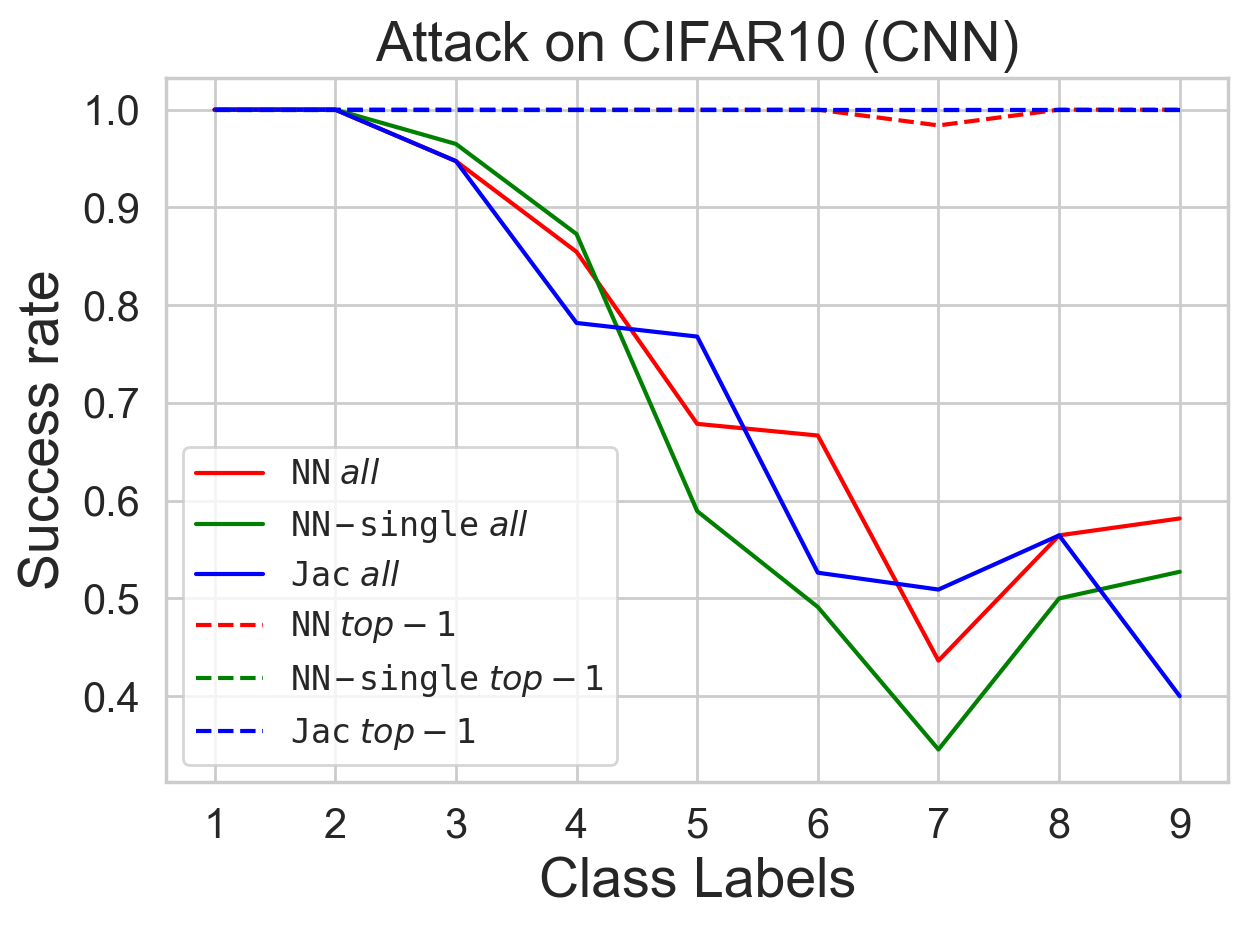

In [6]:
exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10_cnn = exp1_cifar10[exp1_cifar10['model'] == 'cnn']
print(len(exp1_cifar10_cnn))
x = exp1_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar10_cnn[exp1_cifar10_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR10 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-CIFAR10-cnn.png")

15


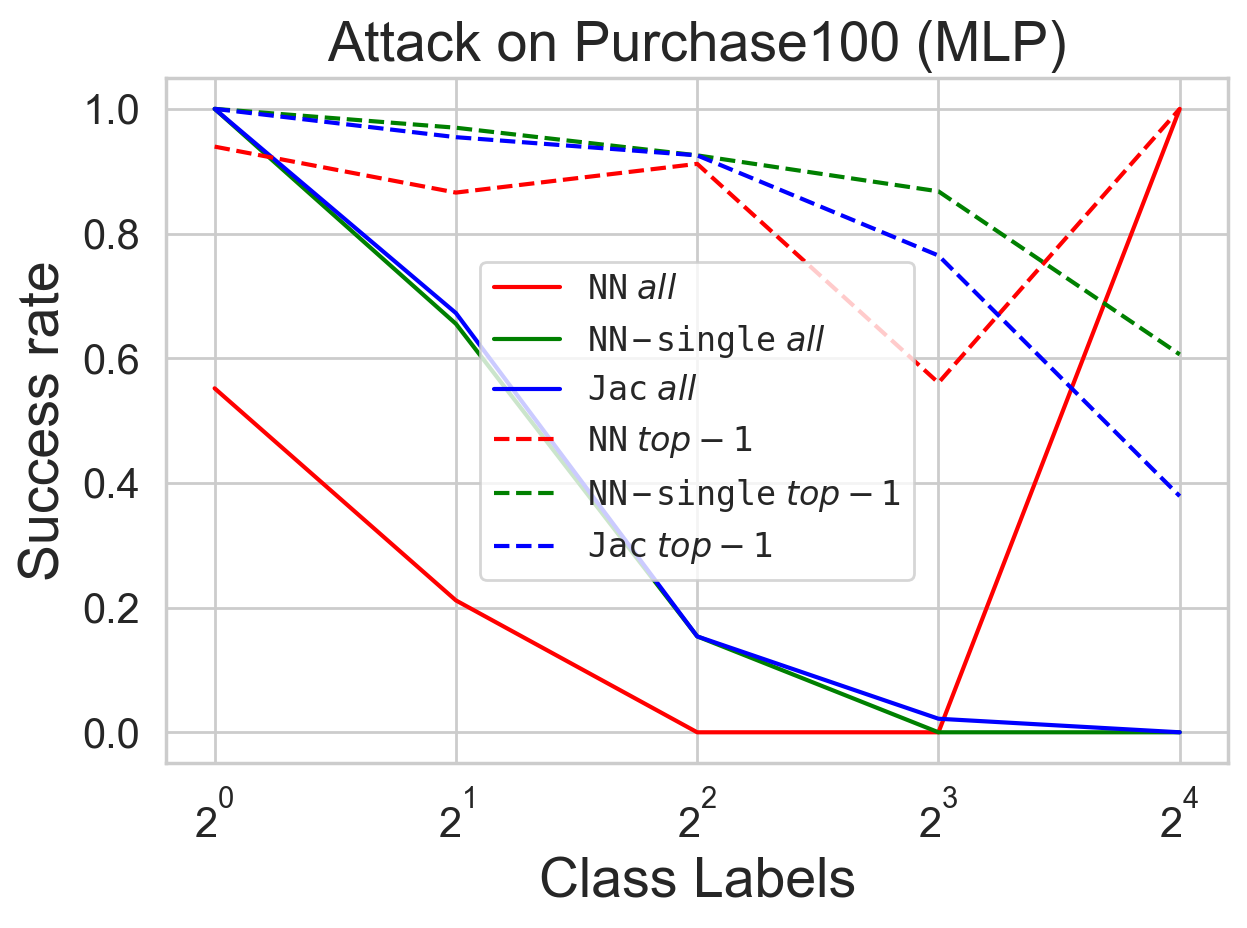

In [7]:
exp1_purchase100 = exp1[exp1['dataset'] == 'purchase100']
exp1_purchase100_mlp = exp1_purchase100[exp1_purchase100['model'] == 'mlp']
print(len(exp1_purchase100_mlp))
x = exp1_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_purchase100_mlp[exp1_purchase100_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on Purchase100 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)
ax.set_xscale('log', base=2)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-purchase100-mlp.png")

15


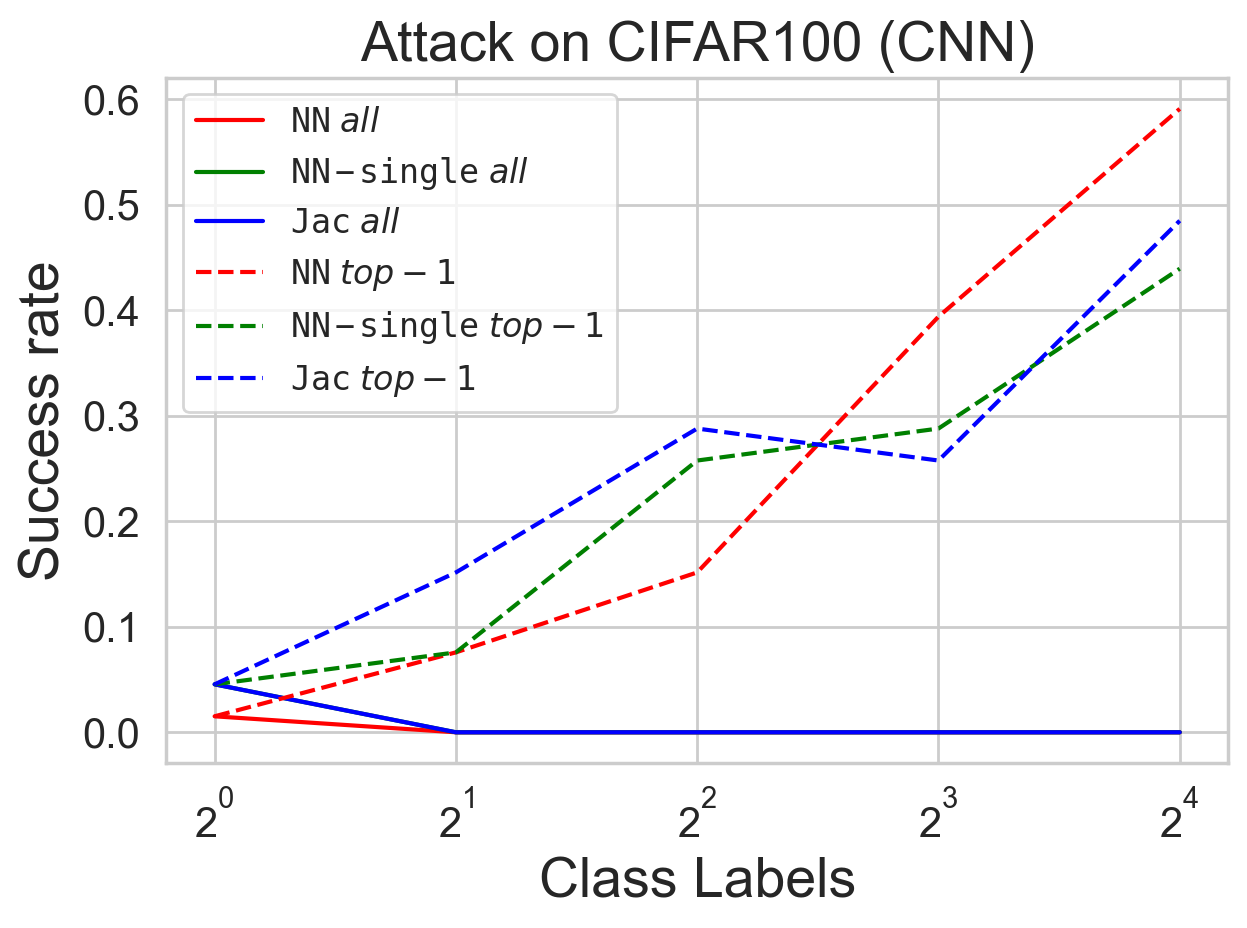

In [8]:
exp1_cifar100 = exp1[exp1['dataset'] == 'cifar100']
exp1_cifar100_cnn = exp1_cifar100[exp1_cifar100['model'] == 'cnn']
print(len(exp1_cifar100_cnn))
x = exp1_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp1_cifar100_cnn[exp1_cifar100_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR100 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Class Labels", fontsize=20)
ax.set_xscale('log', base=2)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-cifar100-cnn.png")

## exp2
- attack success rate for each dataset and global model
    - evaluation metrics: all and top-1
- random number of label

In [33]:
exp2 = pd.read_csv(exp_results_path / 'exp2.csv', header=None, names=exp2_names, index_col=None)
exp2

dataset  epochs  frac  num_users  num_of_label_k  random_num_label  \
0       mnist       3   0.3        100               1              True   
1       mnist       3   0.3        100               1              True   
2       mnist       3   0.3        100               1              True   
3       mnist       3   0.3        100               2              True   
4       mnist       3   0.3        100               2              True   
..        ...     ...   ...        ...             ...               ...   
109  cifar100       1   0.3        100               4              True   
110  cifar100       1   0.3        100               8              True   
111  cifar100       1   0.3        100               8              True   
112  cifar100       1   0.3        100              16              True   
113  cifar100       1   0.3        100              16              True   

    model  alpha      attack  fixed_inference_number  single_model  \
0     mlp    0.1          nn                     NaN         False   
1     mlp    0.1          nn                     NaN          True   
2     mlp    0.1  clustering                     NaN         False   
3     mlp    0.1          nn                     NaN         False   
4     mlp    0.1          nn                     NaN          True   
..    ...    ...         ...                     ...           ...   
109   cnn    0.1  clustering                     NaN         False   
110   cnn    0.1          nn                     NaN          True   
111   cnn    0.1  clustering                     NaN         False   
112   cnn    0.1          nn                     NaN          True   
113   cnn    0.1  clustering                     NaN         False   

     attacker_batch_size  seed       all     top-1  num  missing_labels  \
0                   32.0     0  1.000000  1.000000   66               0   
1                   32.0     0  1.000000  1.000000   66               0   
2                    NaN     0  1.000000  1.000000   66               0   
3                   32.0     0  0.797101  1.000000   69               0   
4                   32.0     0  0.753623  1.000000   69               0   
..                   ...   ...       ...       ...  ...             ...   
109                  NaN     0  0.000000  0.166667   30               0   
110                 32.0     0  0.000000  0.400000   30               0   
111                  NaN     0  0.000000  0.466667   30               0   
112                 32.0     0  0.000000  0.133333   30               0   
113                  NaN     0  0.000000  0.033333   30               0   

          timestamp  
0    20220126112000  
1    20220126112340  
2    20220126112348  
3    20220126112549  
4    20220126112928  
..              ...  
109  20220126231348  
110  20220126232836  
111  20220126233545  
112  20220126235042  
113  20220126235759  

[114 rows x 18 columns]

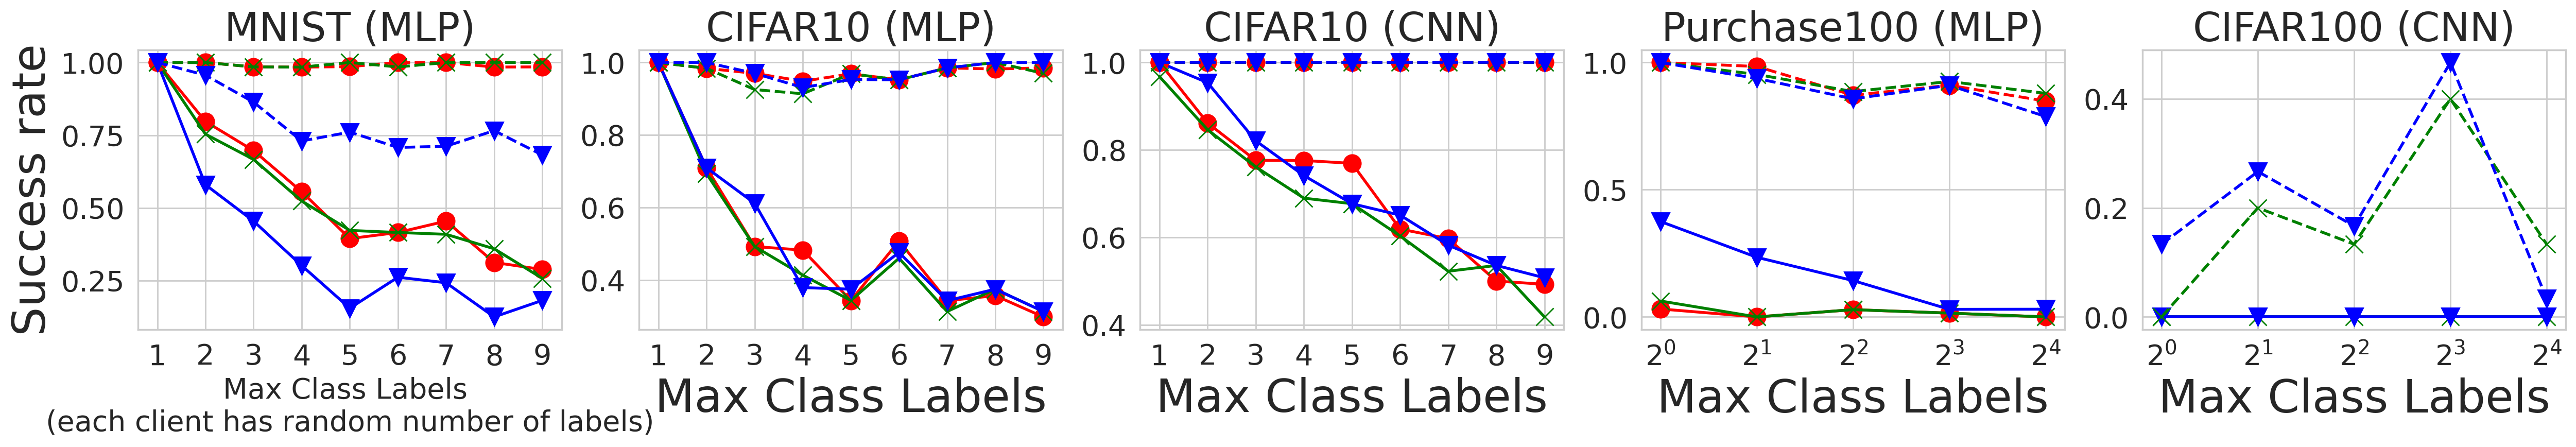

In [45]:
fig = plt.figure(dpi=200, figsize=(25, 4.5))

ax1 = fig.add_subplot(1, 5, 1)

exp2_minist = exp2[exp2['dataset'] == 'mnist']
x = exp2_minist['num_of_label_k'].unique()
nn_total = exp2_minist[exp2_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_minist[exp2_minist['attack'] == 'clustering']

ax1.set_title("MNIST (MLP)", fontsize=28)
ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=32)
ax1.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xticks(x)

handles, labels = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(1, 5, 2)
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_mlp = exp2_cifar10[exp2_cifar10['model'] == 'mlp']
x = exp2_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'clustering']

ax2.set_title("CIFAR10 (MLP)", fontsize=28)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Max Class Labels", fontsize=32)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xticks(x)


ax3 = fig.add_subplot(1, 5, 3)
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_cnn = exp2_cifar10[exp2_cifar10['model'] == 'cnn']
x = exp2_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'clustering']

ax3.set_title("CIFAR10 (CNN)", fontsize=28)

ax3.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax3.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax3.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax3.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax3.legend().remove()
ax3.set_ylabel("", fontsize=0)
ax3.set_xlabel("Max Class Labels", fontsize=32)

ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xticks(x)


ax4 = fig.add_subplot(1, 5, 4)
exp2_purchase100 = exp2[exp2['dataset'] == 'purchase100']
exp2_purchase100 = exp2_purchase100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_purchase100_mlp = exp2_purchase100[exp2_purchase100['model'] == 'mlp']
x = exp2_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'clustering']

ax4.set_title("Purchase100 (MLP)", fontsize=28)

ax4.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

ax4.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax4.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax4.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax4.legend().remove()
ax4.set_ylabel("", fontsize=0)
ax4.set_xlabel("Max Class Labels", fontsize=32)
ax4.set_xscale('log', base=2)

ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_xticks(x)

ax5 = fig.add_subplot(1, 5, 5)
exp2_cifar100 = exp2[exp2['dataset'] == 'cifar100']
# exp2_cifar100 = exp2_cifar100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_cifar100_cnn = exp2_cifar100[exp2_cifar100['model'] == 'cnn']
x = exp2_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'clustering']

ax5.set_title("CIFAR100 (CNN)", fontsize=28)

# ax5.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=2, marker="v", markersize=12)

# ax5.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=2, marker="o", markersize=12)
ax5.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=2, marker="x", markersize=12)
ax5.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=2, marker="v", markersize=12)

ax5.legend().remove()
ax5.set_ylabel("", fontsize=0)
ax5.set_xlabel("Max Class Labels", fontsize=32)
ax5.set_xscale('log', base=2)

ax5.tick_params(axis='x', labelsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.set_xticks(x)

# fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.15), fontsize=24)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-all-random.png", bbox_inches = "tight")

27


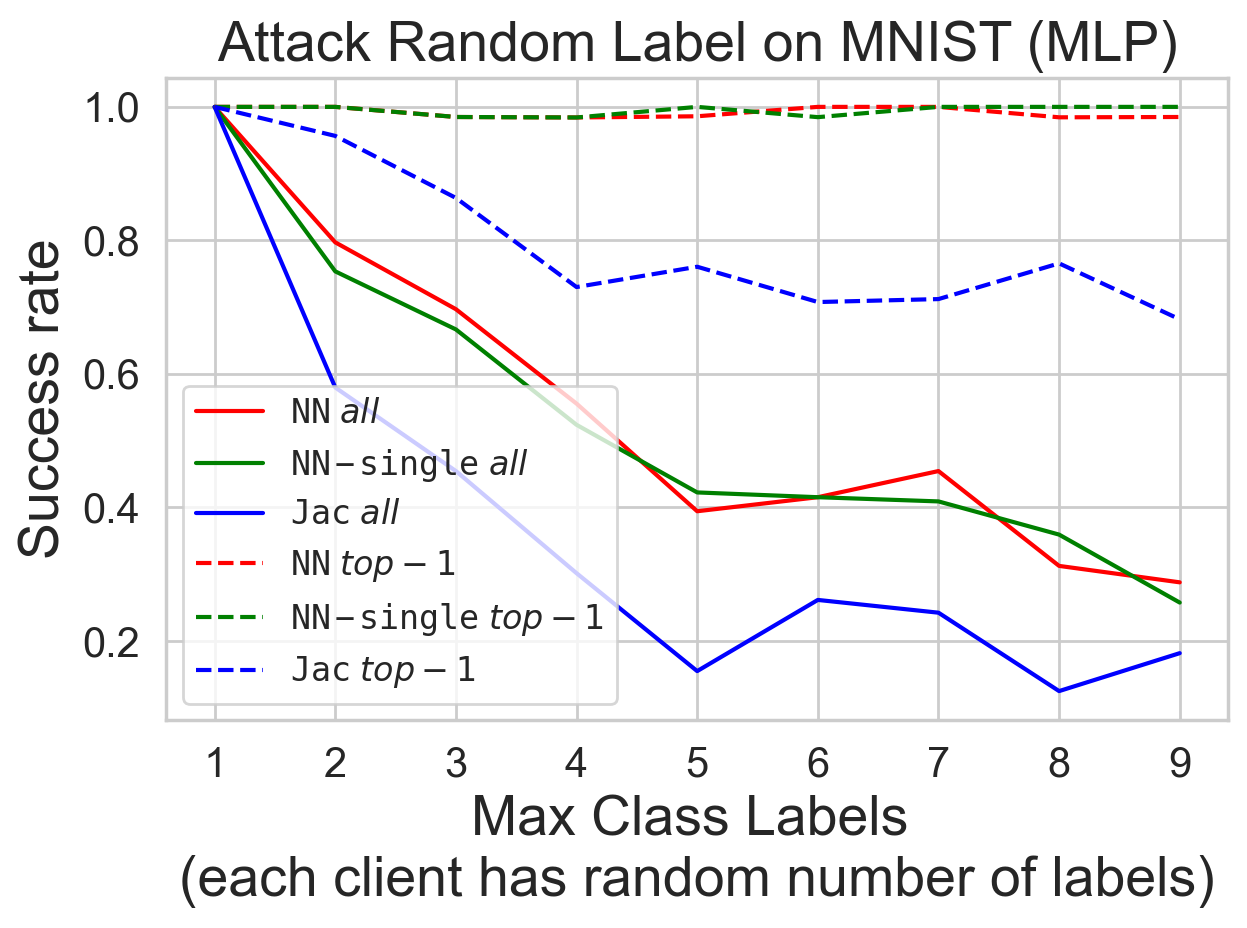

In [10]:
exp2_minist = exp2[exp2['dataset'] == 'mnist']
print(len(exp2_minist))
x = exp2_minist['num_of_label_k'].unique()
nn_total = exp2_minist[exp2_minist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_minist[exp2_minist['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-MNIST-mlp.png")

27


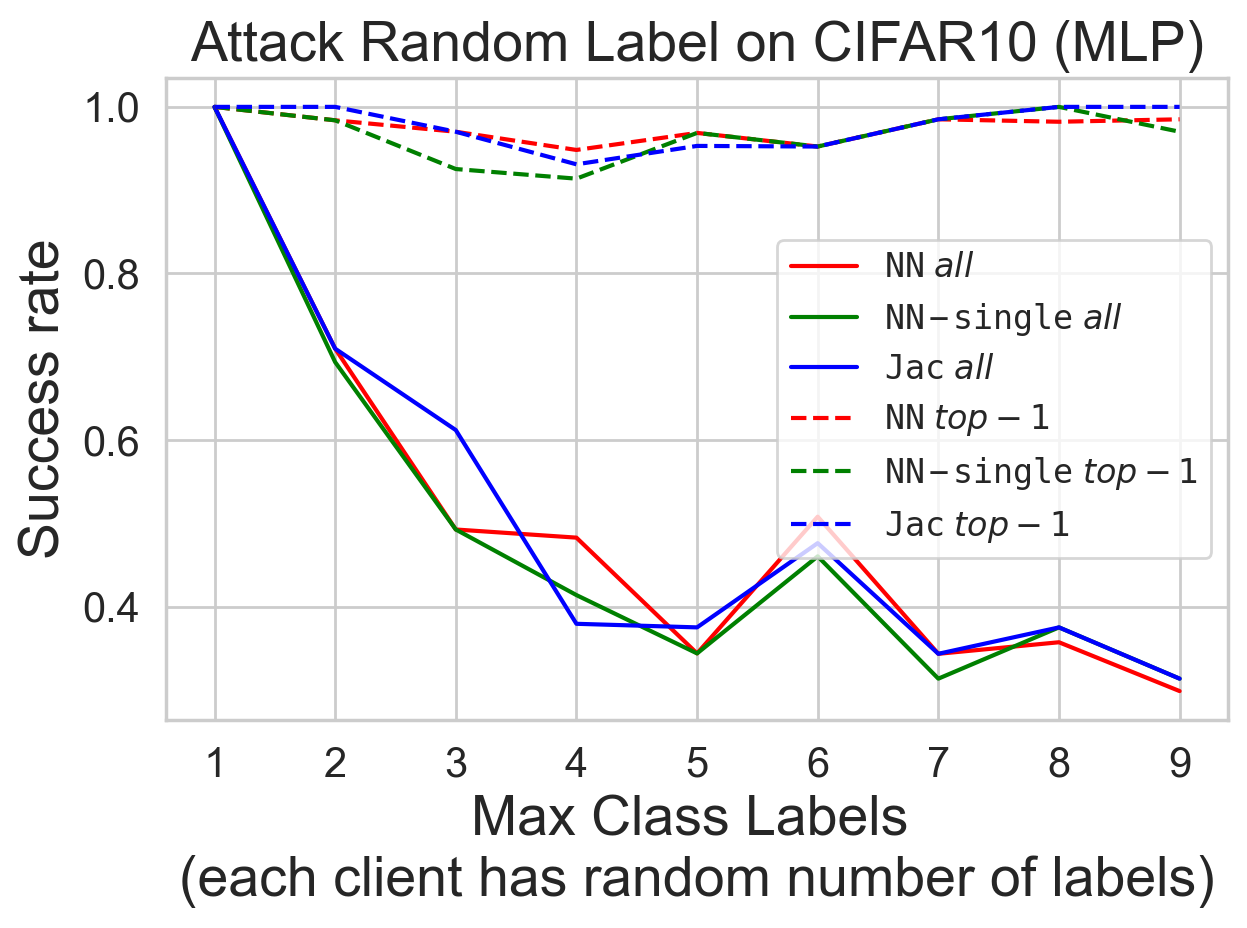

In [11]:
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_mlp = exp2_cifar10[exp2_cifar10['model'] == 'mlp']
print(len(exp2_cifar10_mlp))
x = exp2_cifar10_mlp['num_of_label_k'].unique()
nn_total = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_mlp[exp2_cifar10_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on CIFAR10 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-CIFAR10-mlp.png")

27


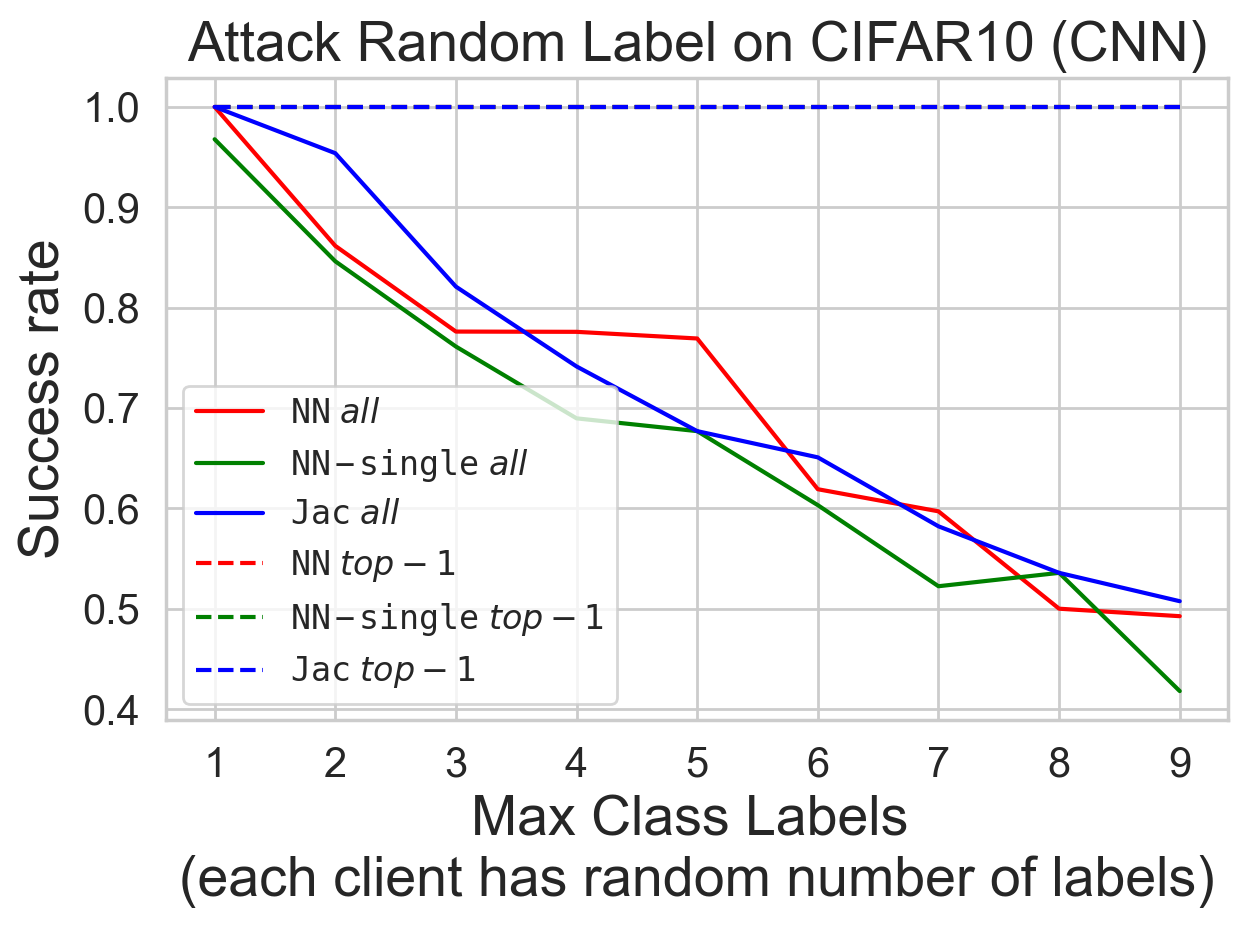

In [12]:
exp2_cifar10 = exp2[exp2['dataset'] == 'cifar10']
exp2_cifar10_cnn = exp2_cifar10[exp2_cifar10['model'] == 'cnn']
print(len(exp2_cifar10_cnn))
x = exp2_cifar10_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar10_cnn[exp2_cifar10_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on CIFAR10 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-CIFAR10-cnn.png")

15


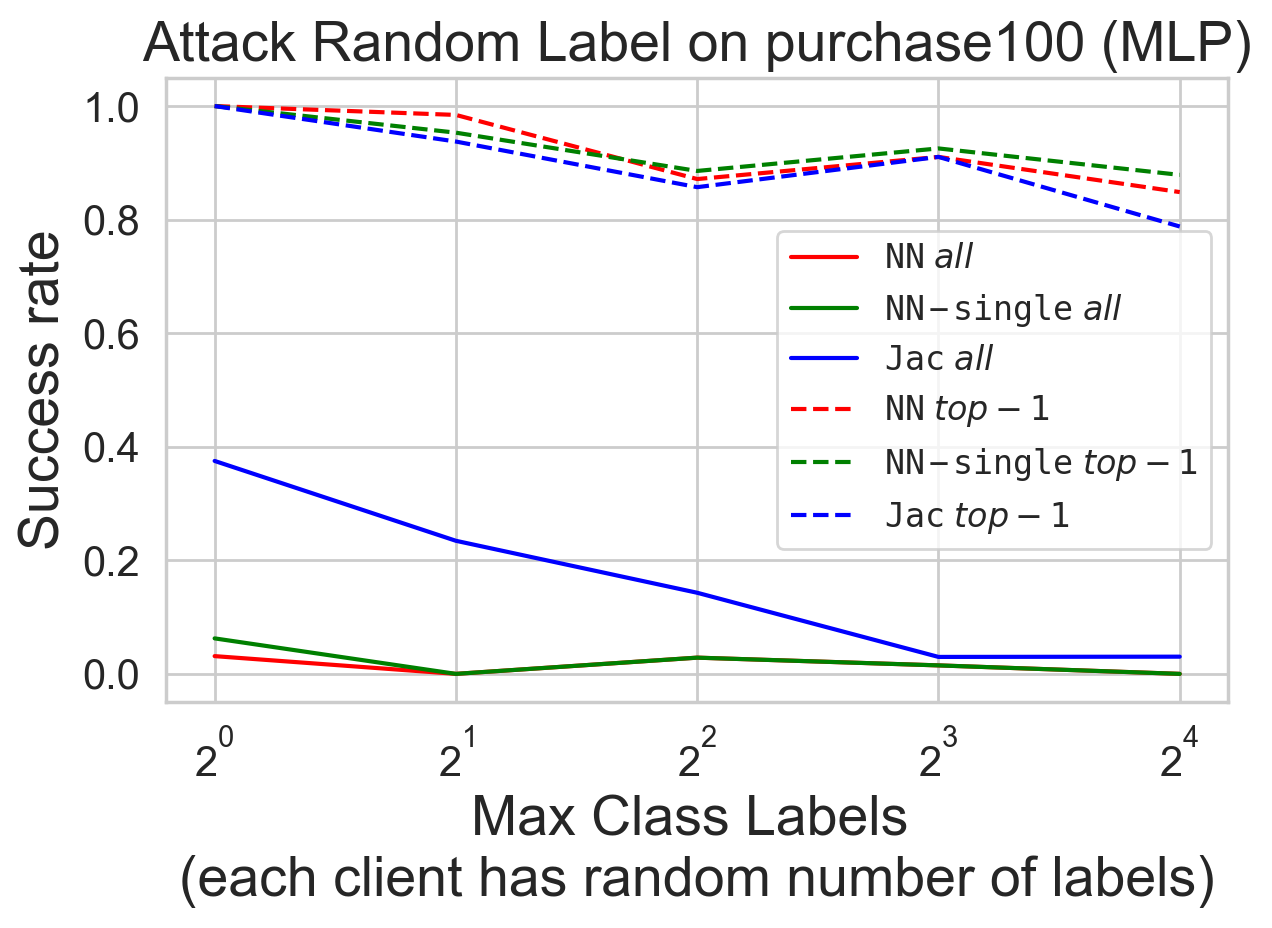

In [13]:
exp2_purchase100 = exp2[exp2['dataset'] == 'purchase100']
exp2_purchase100 = exp2_purchase100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_purchase100_mlp = exp2_purchase100[exp2_purchase100['model'] == 'mlp']
print(len(exp2_purchase100_mlp))
x = exp2_purchase100_mlp['num_of_label_k'].unique()
nn_total = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_purchase100_mlp[exp2_purchase100_mlp['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on purchase100 (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(x)
ax.set_xscale('log', base=2)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-purchase100-mlp.png")

10


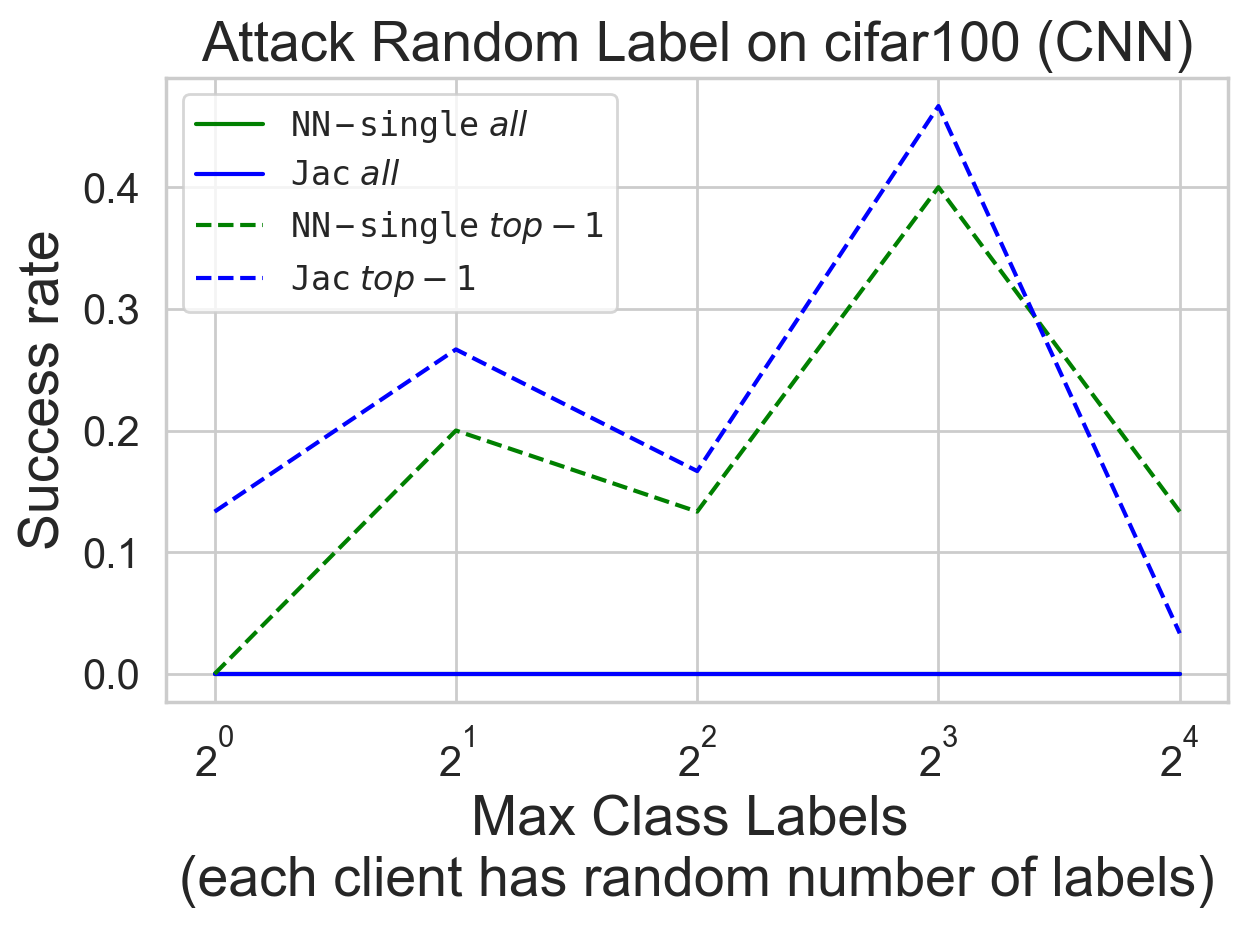

In [14]:
exp2_cifar100 = exp2[exp2['dataset'] == 'cifar100']
# exp2_cifar100 = exp2_cifar100.groupby(['num_of_label_k', 'attack', 'model', 'single_model']).mean().reset_index()
exp2_cifar100_cnn = exp2_cifar100[exp2_cifar100['model'] == 'cnn']
print(len(exp2_cifar100_cnn))
x = exp2_cifar100_cnn['num_of_label_k'].unique()
nn_total = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp2_cifar100_cnn[exp2_cifar100_cnn['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack Random Label on cifar100 (CNN)", fontsize=20)

# ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

# ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Max Class Labels \n(each client has random number of labels)", fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xscale('log', base=2)
ax.set_xticks(x)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-random-label-cifar100-mlp.png")

## exp3
- Attack performance for each sparse ratio
- fixed-number
- inference number => 2

In [57]:
exp3 = pd.read_csv(exp_results_path / 'exp3.csv', header=None, names=exp3_names, index_col=None)
exp3

dataset  epochs  frac  num_users  num_of_label_k  random_num_label model  \
0      mnist       3   0.3        100               2             False   mlp   
1      mnist       3   0.3        100               2             False   mlp   
2      mnist       3   0.3        100               2             False   mlp   
3      mnist       3   0.3        100               2             False   mlp   
4      mnist       3   0.3        100               2             False   mlp   
5      mnist       3   0.3        100               2             False   mlp   
6      mnist       3   0.3        100               2             False   mlp   
7      mnist       3   0.3        100               2             False   mlp   
8      mnist       3   0.3        100               2             False   mlp   
9      mnist       3   0.3        100               2             False   mlp   
10     mnist       3   0.3        100               2             False   mlp   
11     mnist       3   0.3        100               2             False   mlp   
12     mnist       3   0.3        100               2             False   mlp   
13     mnist       3   0.3        100               2             False   mlp   
14     mnist       3   0.3        100               2             False   mlp   
15     mnist       3   0.3        100               2             False   mlp   
16     mnist       3   0.3        100               2             False   mlp   
17     mnist       3   0.3        100               2             False   mlp   
18     mnist       3   0.3        100               2             False   mlp   
19     mnist       3   0.3        100               2             False   mlp   
20     mnist       3   0.3        100               2             False   mlp   
21     mnist       3   0.3        100               2             False   mlp   
22     mnist       3   0.3        100               2             False   mlp   
23     mnist       3   0.3        100               2             False   mlp   
24  cifar100       1   0.3        100               2              True   cnn   
25  cifar100       1   0.3        100               2              True   cnn   
26  cifar100       1   0.3        100               2              True   cnn   
27  cifar100       1   0.3        100               2              True   cnn   
28  cifar100       1   0.3        100               2              True   cnn   
29  cifar100       1   0.3        100               2              True   cnn   
30  cifar100       1   0.3        100               2              True   cnn   
31  cifar100       1   0.3        100               2              True   cnn   
32  cifar100       1   0.3        100               2              True   cnn   
33  cifar100       1   0.3        100               2              True   cnn   
34  cifar100       1   0.3        100               2              True   cnn   
35  cifar100       1   0.3        100               2              True   cnn   
36  cifar100       1   0.3        100               2              True   cnn   
37  cifar100       1   0.3        100               2              True   cnn   
38  cifar100       1   0.3        100               2              True   cnn   
39  cifar100       1   0.3        100               2              True   cnn   

     alpha      attack  fixed_inference_number  single_model  \
0   0.0125          nn                       2         False   
1   0.0125          nn                       2          True   
2   0.0125  clustering                       2         False   
3   0.0250          nn                       2         False   
4   0.0250          nn                       2          True   
5   0.0250  clustering                       2         False   
6   0.0500          nn                       2         False   
7   0.0500          nn                       2          True   
8   0.0500  clustering                       2         False   
9   0.1000          nn                     

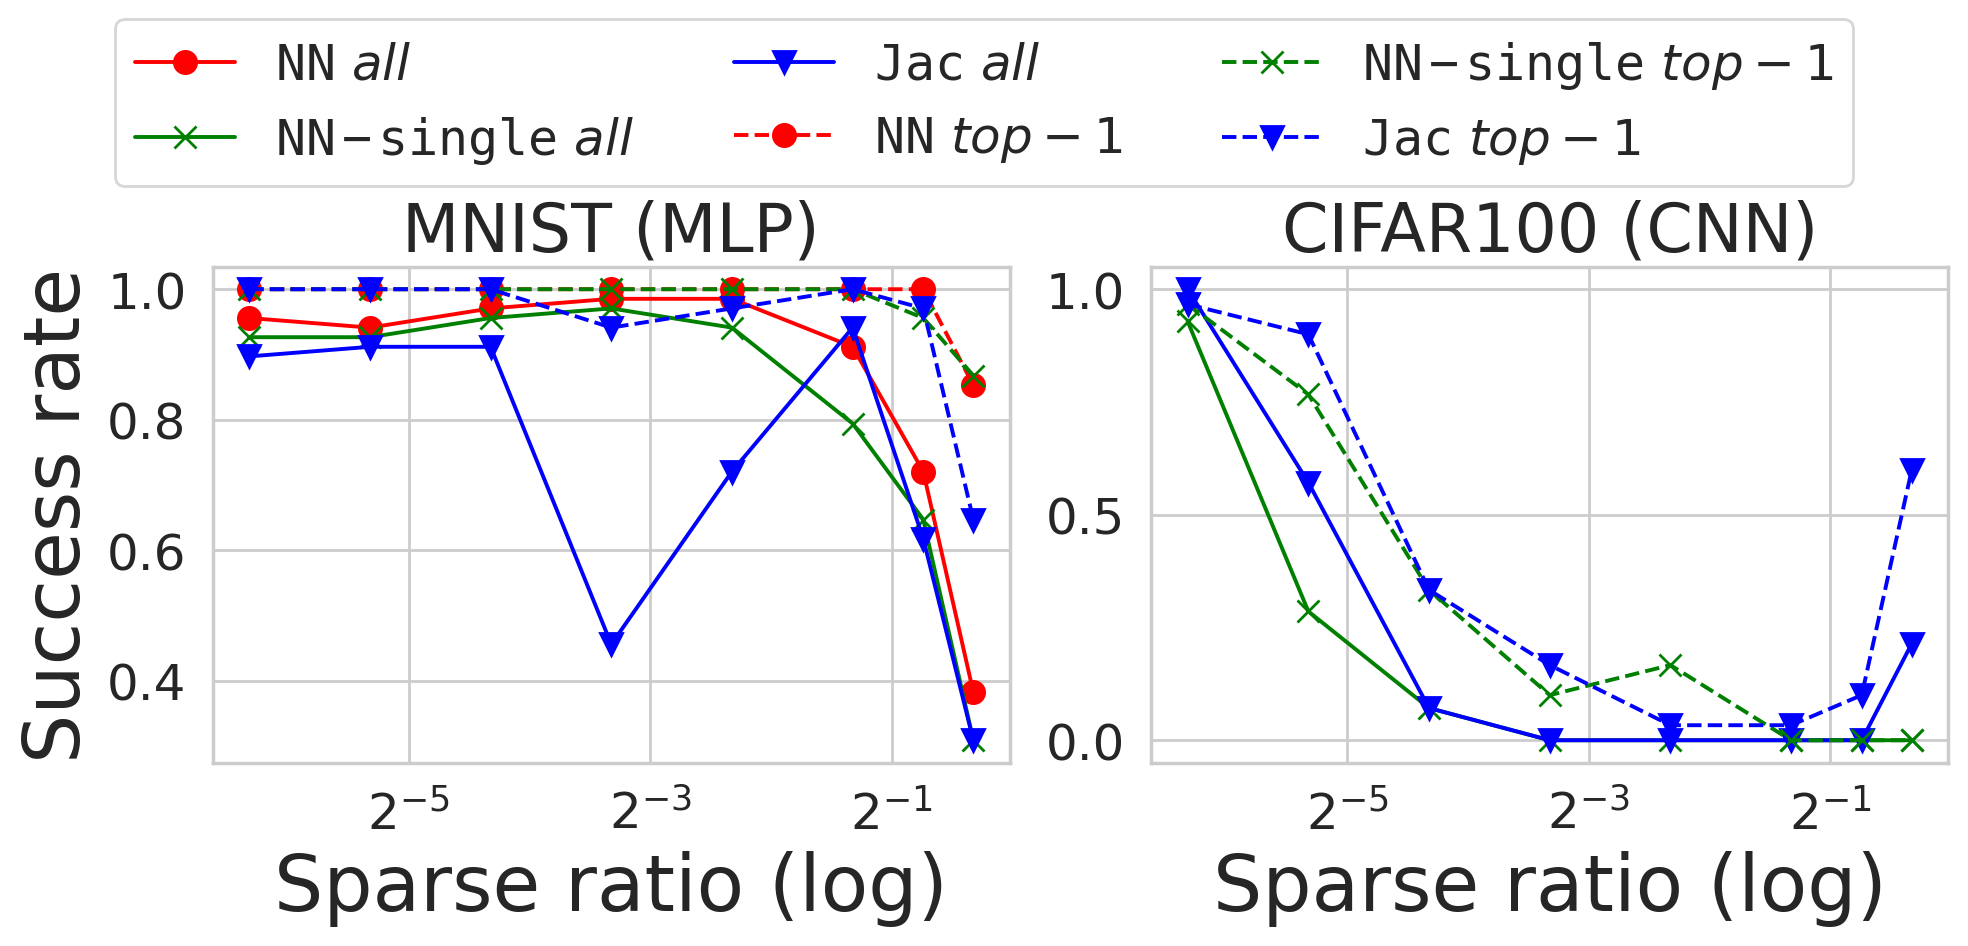

In [127]:
import matplotlib.ticker
exp3_mnist = exp3[exp3['dataset'] == 'mnist']
exp3_mnist = exp3_mnist[exp3_mnist['model'] == 'mlp']
x = exp3_mnist['alpha'].unique()
nn_total = exp3_mnist[exp3_mnist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_mnist[exp3_mnist['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("MNIST (MLP)", fontsize=24)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=1.4, marker="o", markersize=8)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=1.4, marker="v", markersize=8)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=1.4, marker="o", markersize=8)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=1.4, marker="v", markersize=8)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=28)
ax1.set_xlabel("Sparse ratio (log)", fontsize=28)

ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xscale('log', base=2)
# ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax1.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])
handles, labels = ax1.get_legend_handles_labels()


exp3_cifar100 = exp3[exp3['dataset'] == 'cifar100']
exp3_cifar100 = exp3_cifar100[exp3_cifar100['model'] == 'cnn']
x = exp3_cifar100['alpha'].unique()
nn_total = exp3_cifar100[exp3_cifar100['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_cifar100[exp3_cifar100['attack'] == 'clustering']


ax2 = fig.add_subplot(1, 2, 2)

ax2.set_title("CIFAR100 (CNN)", fontsize=24)

# ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=1.4, marker="v", markersize=8)

# ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=1.4, marker="v", markersize=8)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Sparse ratio (log)", fontsize=28)

ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xscale('log', base=2)
# ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax2.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])

fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.21), fontsize=18)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-sparse-rate.png", bbox_inches = "tight")

24


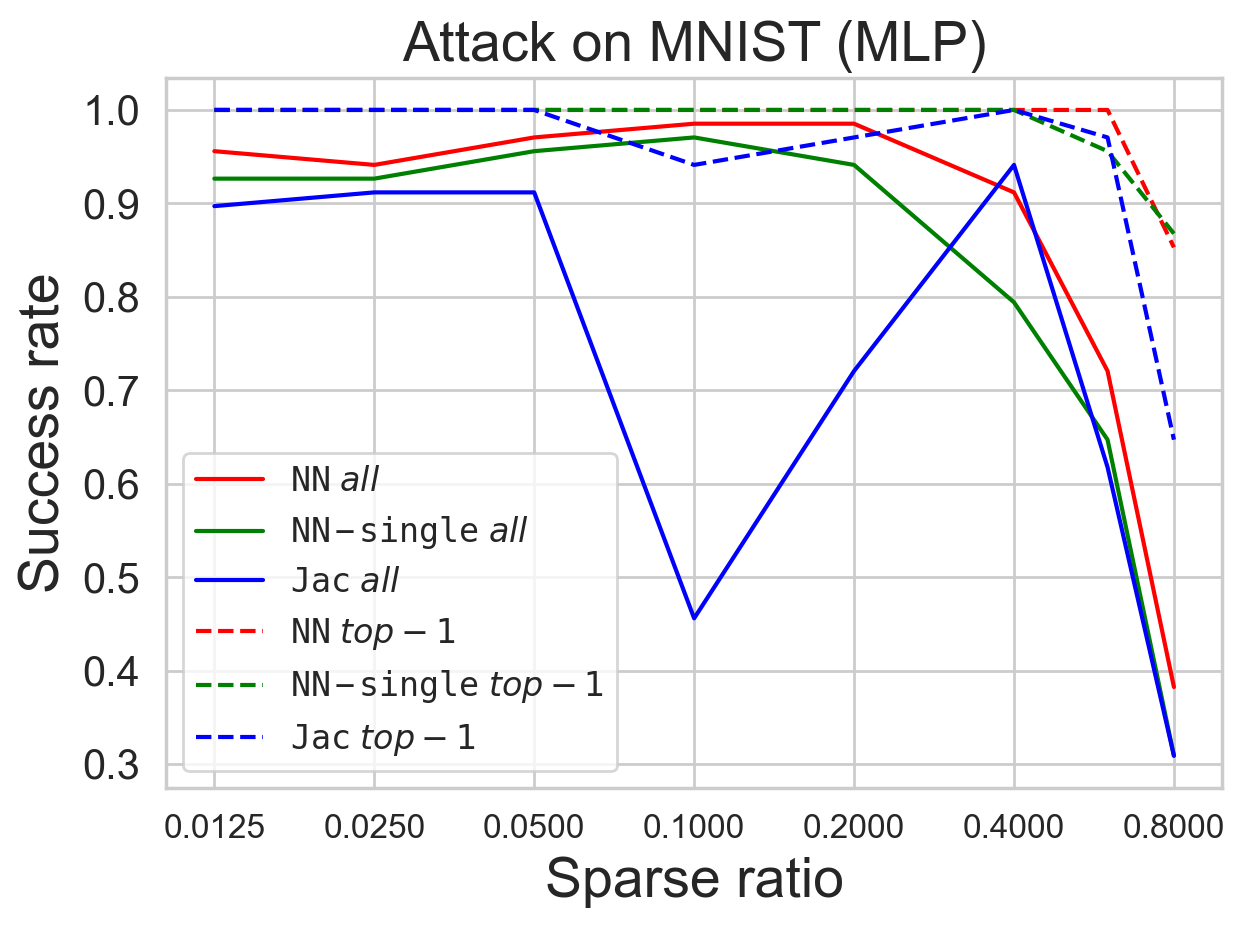

In [16]:
import matplotlib.ticker
exp3_mnist = exp3[exp3['dataset'] == 'mnist']
exp3_mnist = exp3_mnist[exp3_mnist['model'] == 'mlp']
print(len(exp3_mnist))
x = exp3_mnist['alpha'].unique()
nn_total = exp3_mnist[exp3_mnist['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_mnist[exp3_mnist['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)
ax.set_xscale('log', base=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-sparse-rate-mnist.png")

16


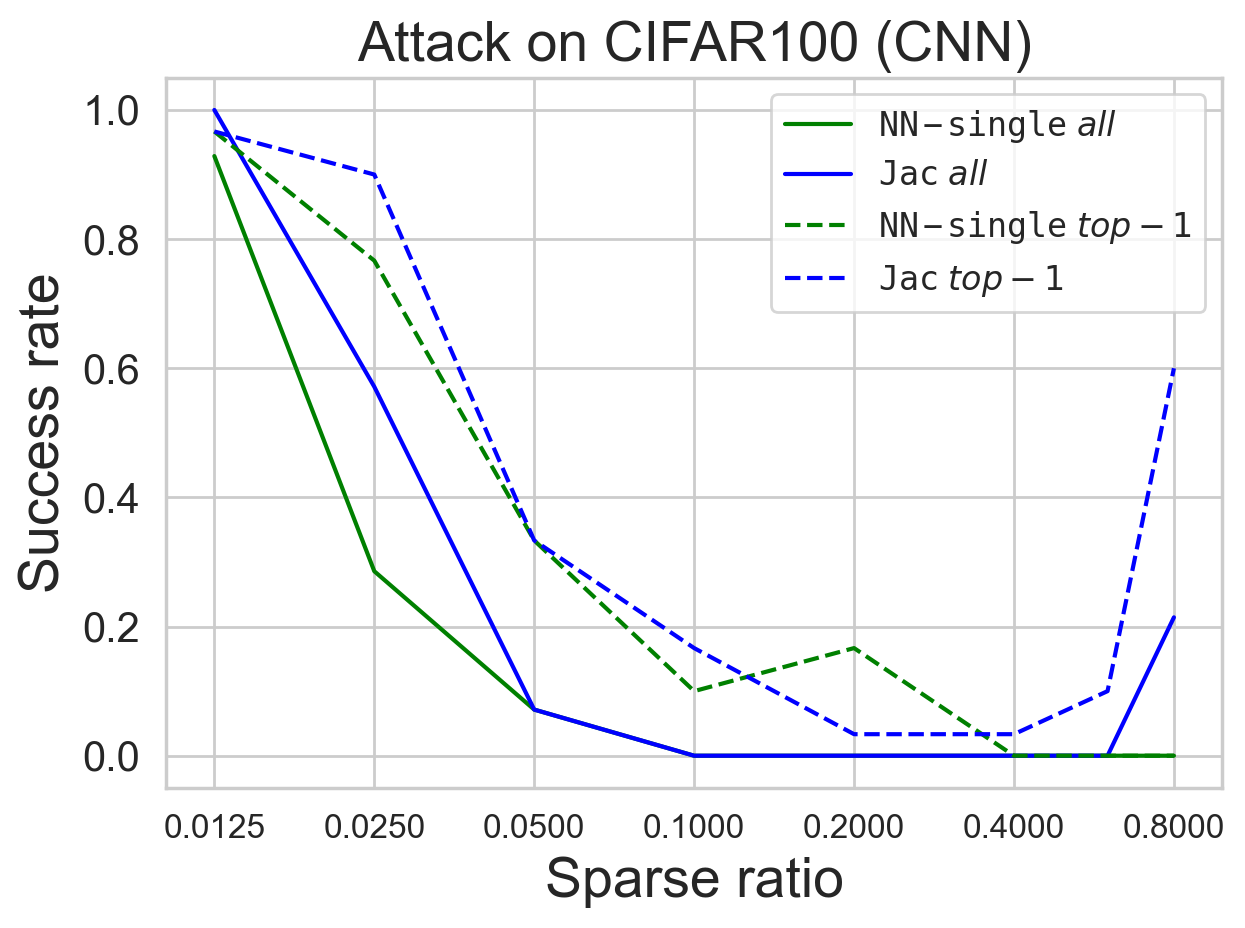

In [17]:
exp3_cifar100 = exp3[exp3['dataset'] == 'cifar100']
exp3_cifar100 = exp3_cifar100[exp3_cifar100['model'] == 'cnn']
print(len(exp3_cifar100))
x = exp3_cifar100['alpha'].unique()
nn_total = exp3_cifar100[exp3_cifar100['attack'] == 'nn']
# nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp3_cifar100[exp3_cifar100['attack'] == 'clustering']


fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR100 (CNN)", fontsize=20)

# ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

# ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)
ax.set_xscale('log', base=2)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])
plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-sparse-rate-cifar100.png")

## exp4
- Relation between epoch and vulnerability
- random label, max label is 3

In [18]:
exp4 = pd.read_csv(exp_results_path / 'exp4.csv', header=None, names=exp4_names, index_col=None)
exp4

dataset  epochs  frac  num_users  num_of_label_k  random_num_label model  \
0      mnist      20   0.3        100               3              True   mlp   
1      mnist      20   0.3        100               3              True   mlp   
2      mnist      20   0.3        100               3              True   mlp   
3      mnist      20   0.3        100               3              True   mlp   
4      mnist      20   0.3        100               3              True   mlp   
..       ...     ...   ...        ...             ...               ...   ...   
165  cifar10      10   0.3        100               5              True   cnn   
166  cifar10      10   0.3        100               5              True   cnn   
167  cifar10      10   0.3        100               5              True   cnn   
168  cifar10      10   0.3        100               5              True   cnn   
169  cifar10      10   0.3        100               5              True   cnn   

     alpha      attack  fixed_inference_number  single_model  \
0      0.1          nn                     NaN         False   
1      0.1          nn                     NaN         False   
2      0.1          nn                     NaN         False   
3      0.1          nn                     NaN         False   
4      0.1          nn                     NaN         False   
..     ...         ...                     ...           ...   
165    0.1  clustering                     NaN         False   
166    0.1  clustering                     NaN         False   
167    0.1  clustering                     NaN         False   
168    0.1  clustering                     NaN         False   
169    0.1  clustering                     NaN         False   

     attacker_batch_size  seed       all     top-1  num  missing_labels  \
0                   32.0     0  0.633333  1.000000   30               0   
1                   32.0     0  0.666667  1.000000   30               0   
2                   32.0     0  0.633333  0.966667   30               0   
3                   32.0     0  0.600000  0.966667   30               0   
4                   32.0     0  0.633333  1.000000   30               0   
..                   ...   ...       ...       ...  ...             ...   
165                  NaN     0  0.566667  1.000000   30               0   
166                  NaN     0  0.566667  1.000000   30               0   
167                  NaN     0  0.533333  1.000000   30               0   
168                  NaN     0  0.700000  1.000000   30               0   
169                  NaN     0  0.466667  1.000000   30               0   

     round       timestamp  
0        0  20220127124357  
1        1  20220127124357  
2        2  20220127124357  
3        3  20220127124357  
4        4  20220127124357  
..     ...             ...  
165      5  20220203160426  
166      6  20220203160426  
167      7  20220203160426  
168      8  20220203160426  
169      9  20220203160426  

[170 rows x 19 columns]

30


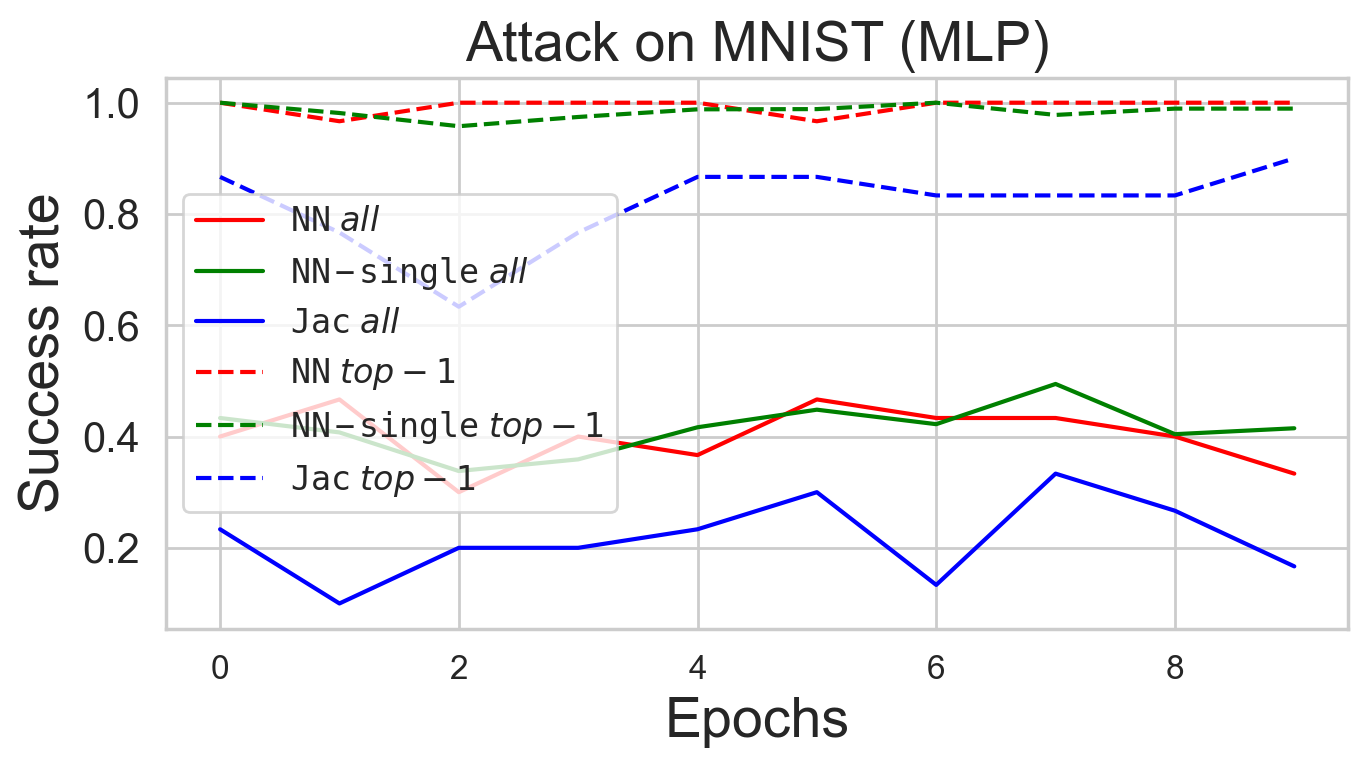

In [19]:
exp4_mnist_03 = exp4[exp4['dataset'] == 'mnist']
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['num_of_label_k'] == 5]
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['round'] <= 9]
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['model'] == 'mlp']
exp4_mnist_03 = exp4_mnist_03[exp4_mnist_03['frac'] == 0.3]
print(len(exp4_mnist_03))
x = exp4_mnist_03['round'].unique()
nn_total = exp4_mnist_03[exp4_mnist_03['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp4_mnist_03[exp4_mnist_03['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Epochs", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-mnist-per-epochs-03.png")

30


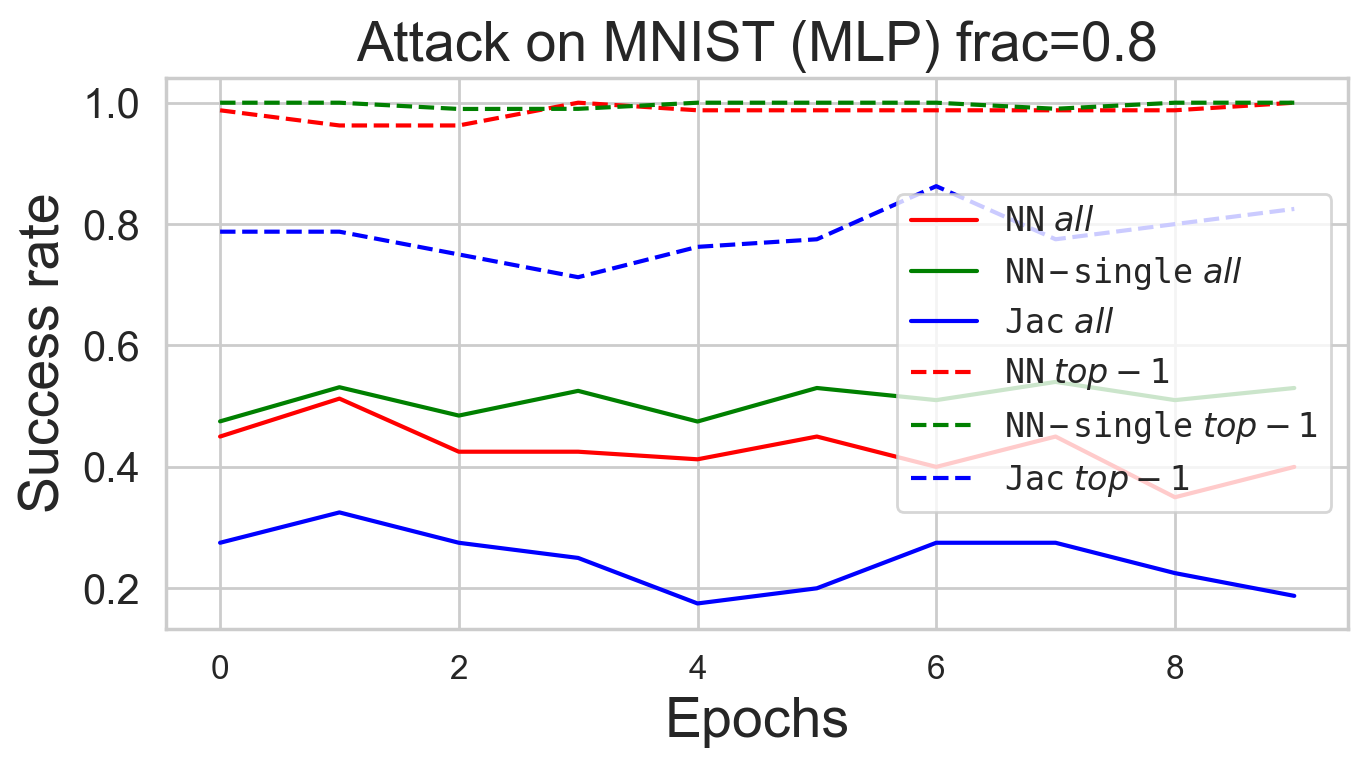

In [20]:
exp4_mnist_08 = exp4[exp4['dataset'] == 'mnist']
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['num_of_label_k'] == 5]
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['round'] <= 9]
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['model'] == 'mlp']
exp4_mnist_08 = exp4_mnist_08[exp4_mnist_08['frac'] == 0.8]
print(len(exp4_mnist_08))
x = exp4_mnist_08['round'].unique()
nn_total = exp4_mnist_08[exp4_mnist_08['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp4_mnist_08[exp4_mnist_08['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on MNIST (MLP) frac=0.8", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Epochs", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-mnist-per-epochs-08.png")

30


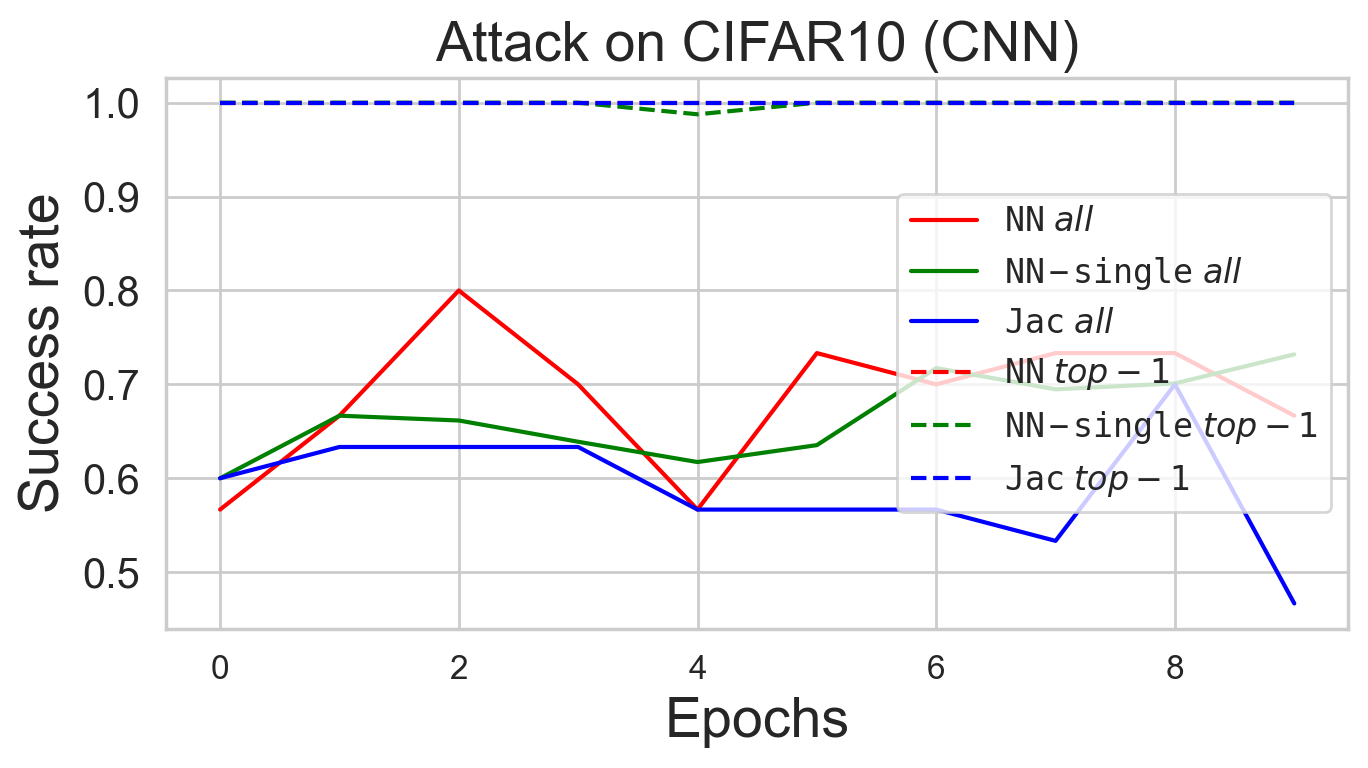

In [21]:
exp4_cifar10_03 = exp4[exp4['dataset'] == 'cifar10']
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['num_of_label_k'] == 5]
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['round'] <= 9]
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['model'] == 'cnn']
exp4_cifar10_03 = exp4_cifar10_03[exp4_cifar10_03['frac'] == 0.3]
print(len(exp4_cifar10_03))
x = exp4_cifar10_03['round'].unique()
nn_total = exp4_cifar10_03[exp4_cifar10_03['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp4_cifar10_03[exp4_cifar10_03['attack'] == 'clustering']


fig = plt.figure(dpi=200, figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Attack on CIFAR10 (CNN)", fontsize=20)

ax.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax.legend(fontsize=12)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("Epochs", fontsize=20)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "attack-cifar10-per-epochs-03.png")

## exp5
- efficiency
- methods
    - baseline
    - advanced 
    - non-oblivious
    - path oram (Zerotrace)

In [117]:
exp5 = pd.read_csv(exp_results_path / 'exp5.csv', header=None, names=exp5_names, index_col=None)
exp5

dataset  epochs  frac  num_users  num_of_label_k  random_num_label  \
0       mnist       1   0.3         10             NaN             False   
1       mnist       1   0.3         10             NaN             False   
2       mnist       1   0.3         10             NaN             False   
3       mnist       1   0.3        100             NaN             False   
4       mnist       1   0.3        100             NaN             False   
..        ...     ...   ...        ...             ...               ...   
716  cifar100       1   0.3        100             NaN             False   
717  cifar100       1   0.3        100             NaN             False   
718  cifar100       1   0.3        100             NaN             False   
719  cifar100       1   0.3        100             NaN             False   
720  cifar100       1   0.3        100             NaN             False   

    model  alpha  seed  aggregation_alg protection  index_privacy_r  \
0     mlp  0.100     0         advanced        NaN              NaN   
1     mlp  0.100     0         baseline        NaN              NaN   
2     mlp  0.100     0    non_oblivious        NaN              NaN   
3     mlp  0.100     0         advanced        NaN              NaN   
4     mlp  0.100     0         baseline        NaN              NaN   
..    ...    ...   ...              ...        ...              ...   
716   cnn  0.025     0  advanced_simple        NaN              NaN   
717   cnn  0.050     0  advanced_simple        NaN              NaN   
718   cnn  0.010     0  advanced_simple        NaN              NaN   
719   cnn  0.200     0  advanced_simple        NaN              NaN   
720   cnn  0.400     0  advanced_simple        NaN              NaN   

     execution_time       timestamp  
0          0.053923  20220127133815  
1          0.080139  20220127133822  
2          0.001457  20220127133830  
3          0.171706  20220127133838  
4          0.541576  20220127133848  
..              ...             ...  
716        0.391090  20220427214518  
717        0.310734  20220427214536  
718        0.151188  20220427214553  
719        2.716754  20220427214617  
720        6.566125  20220427214651  

[721 rows x 14 columns]

In [105]:
exp5.loc[exp5['aggregation_alg'] == 'non_oblivious', 'aggregation_alg'] = 'Non Oblivious'
exp5.loc[exp5['aggregation_alg'] == 'advanced', 'aggregation_alg'] = 'Advanced'
exp5.loc[exp5['aggregation_alg'] == 'baseline', 'aggregation_alg'] = 'Baseline'
exp5.loc[exp5['aggregation_alg'] == 'path_oram', 'aggregation_alg'] = 'Path ORAM'

20


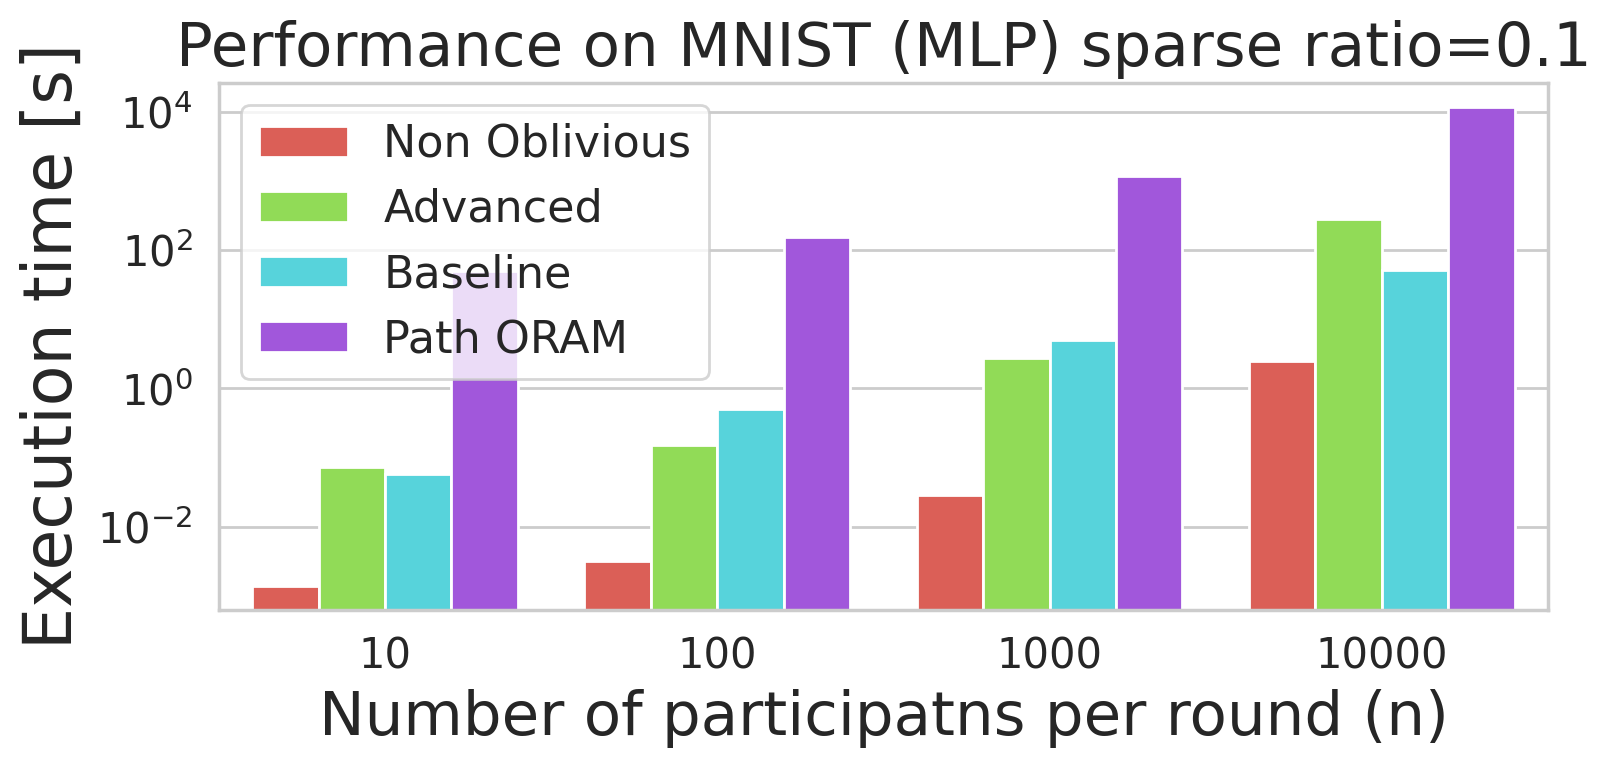

20


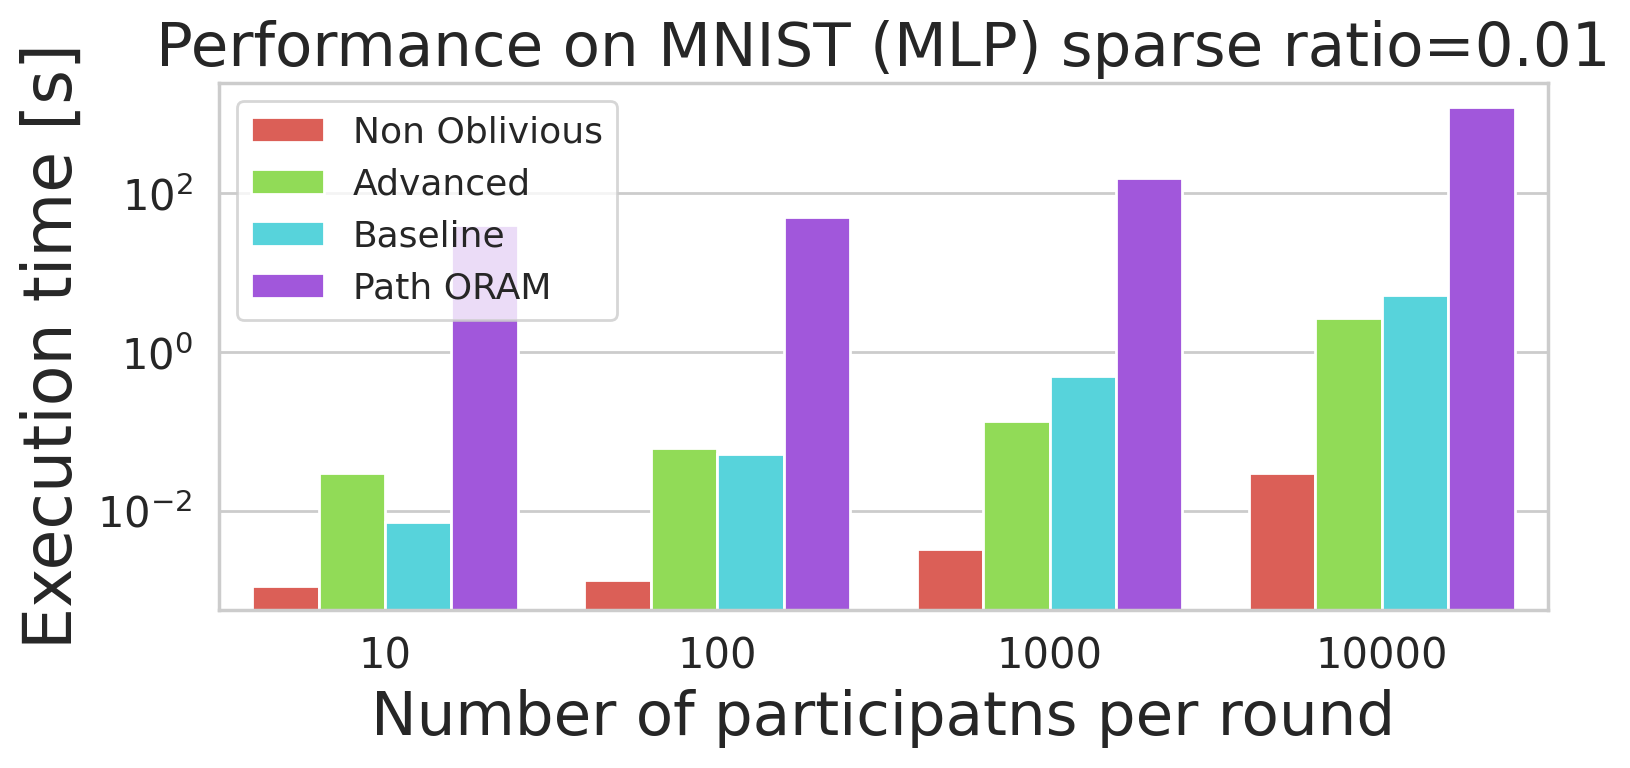

In [110]:
# この結果でnum_users=10000の時にbaselineの方が早いのはなぜ？？？

exp5_mnist = exp5[exp5['dataset'] == 'mnist']
exp5_mnist_without_index_privacy = exp5_mnist[exp5_mnist['index_privacy_r'].isna()]
mnist_by_num_users = exp5_mnist_without_index_privacy.groupby(['num_users', 'aggregation_alg', 'alpha']).mean()
mnist_by_num_users = mnist_by_num_users.reset_index()
mnist_by_num_users_01 = mnist_by_num_users[mnist_by_num_users['alpha'] == 0.1]
print(len(mnist_by_num_users_01))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on MNIST (MLP) sparse ratio=0.1", fontsize=22)

sns.barplot(
    x = 'num_users', y = 'execution_time', hue = 'aggregation_alg', data = mnist_by_num_users_01, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=16)
ax.set_ylabel("Execution time [s]", fontsize=24)
ax.set_xlabel("Number of participatns per round (n)", fontsize=22)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-mlp-01.png")


exp5_mnist = exp5[exp5['dataset'] == 'mnist']
exp5_mnist_without_index_privacy = exp5_mnist[exp5_mnist['index_privacy_r'].isna()]
mnist_by_num_users = exp5_mnist_without_index_privacy.groupby(['num_users', 'aggregation_alg', 'alpha']).mean()
mnist_by_num_users = mnist_by_num_users.reset_index()
mnist_by_num_users_001 = mnist_by_num_users[mnist_by_num_users['alpha'] == 0.01]
print(len(mnist_by_num_users_001))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on MNIST (MLP) sparse ratio=0.01", fontsize=22)

sns.barplot(
    x = 'num_users', y = 'execution_time', hue = 'aggregation_alg', data = mnist_by_num_users_001, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=24)
ax.set_xlabel("Number of participatns per round", fontsize=22)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-mlp-001.png")

12


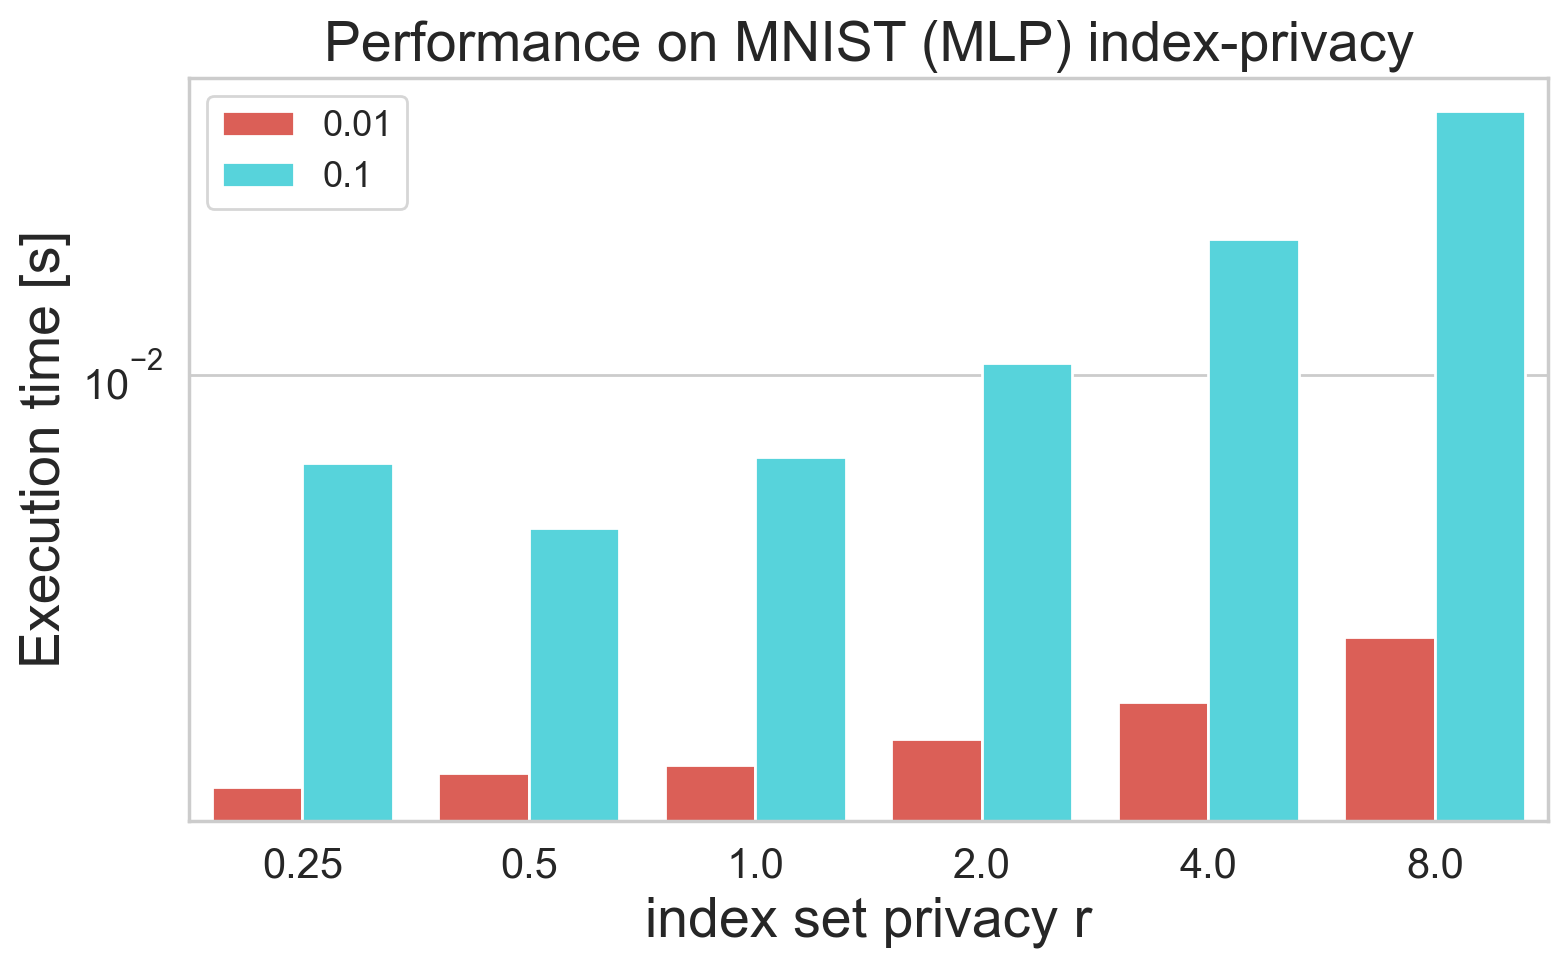

In [25]:
exp5_mnist = exp5[exp5['dataset'] == 'mnist']
mnist_by_index_privacy_r = exp5_mnist.groupby(['alpha', 'index_privacy_r']).mean()
mnist_by_index_privacy_r = mnist_by_index_privacy_r.reset_index()
print(len(mnist_by_index_privacy_r))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on MNIST (MLP) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = mnist_by_index_privacy_r, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index set privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-mlp-index-privacy.png")

8


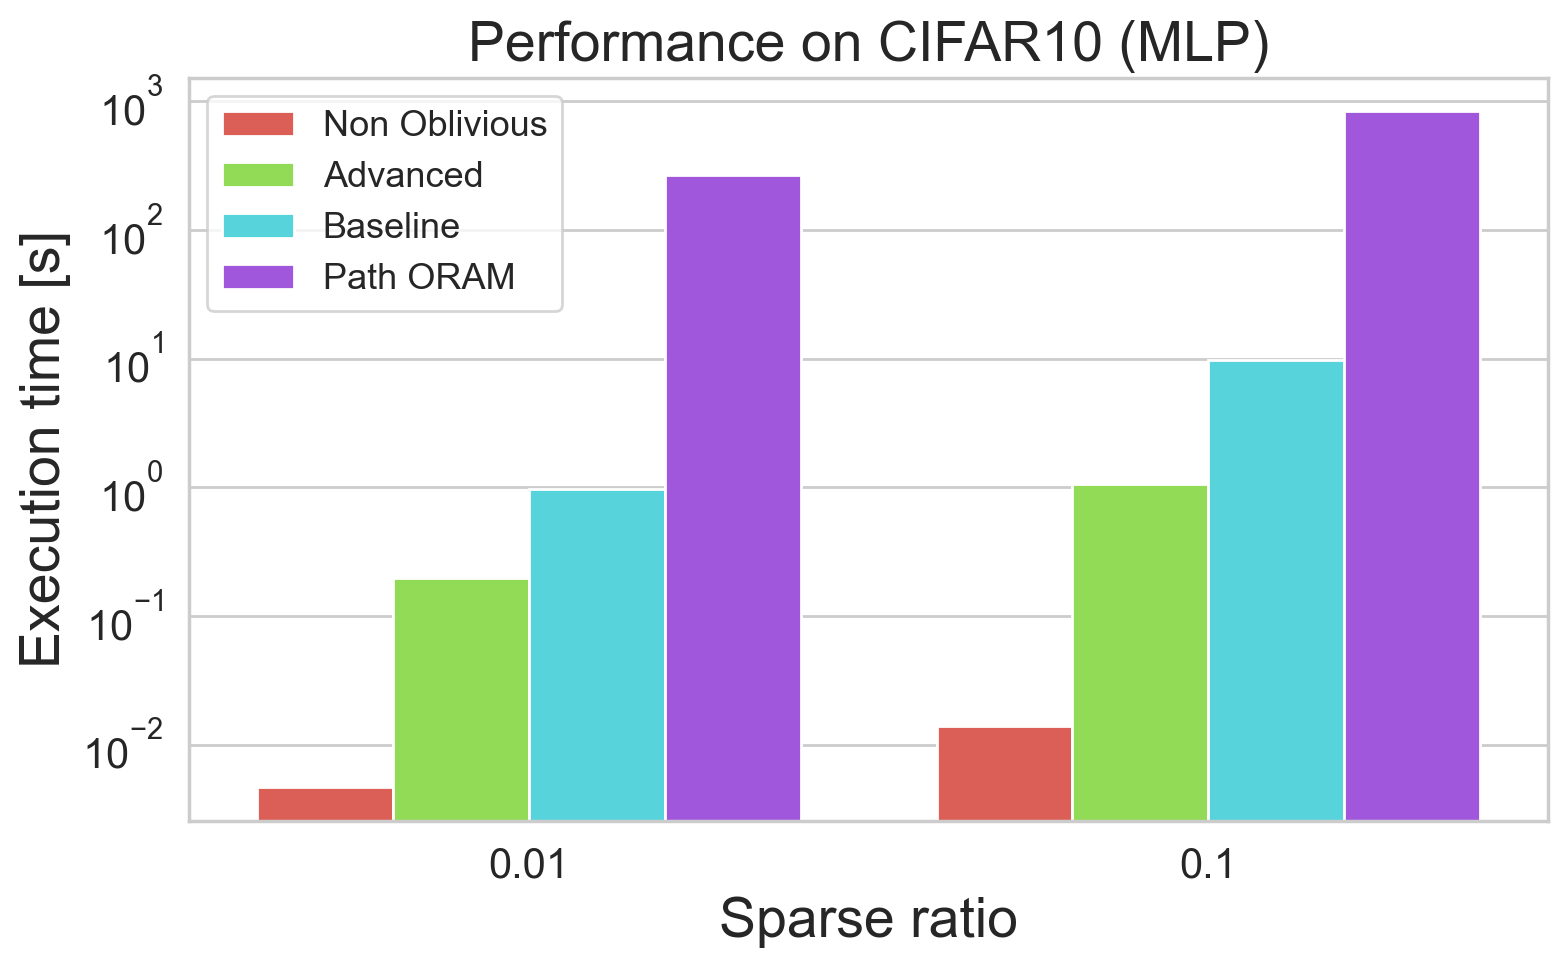

In [26]:
exp5_cifar10 = exp5[exp5['dataset'] == 'cifar10']
exp5_cifar10_without_index_privacy = exp5_cifar10[exp5_cifar10['index_privacy_r'].isna()]
exp5_cifar10_without_index_privacy = exp5_cifar10_without_index_privacy.groupby(['aggregation_alg', 'alpha']).mean()
exp5_cifar10_without_index_privacy = exp5_cifar10_without_index_privacy.reset_index()
print(len(exp5_cifar10_without_index_privacy))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR10 (MLP)", fontsize=20)

sns.barplot(
    x = 'alpha', y = 'execution_time', hue = 'aggregation_alg', data = exp5_cifar10_without_index_privacy, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-cifar10.png")

12


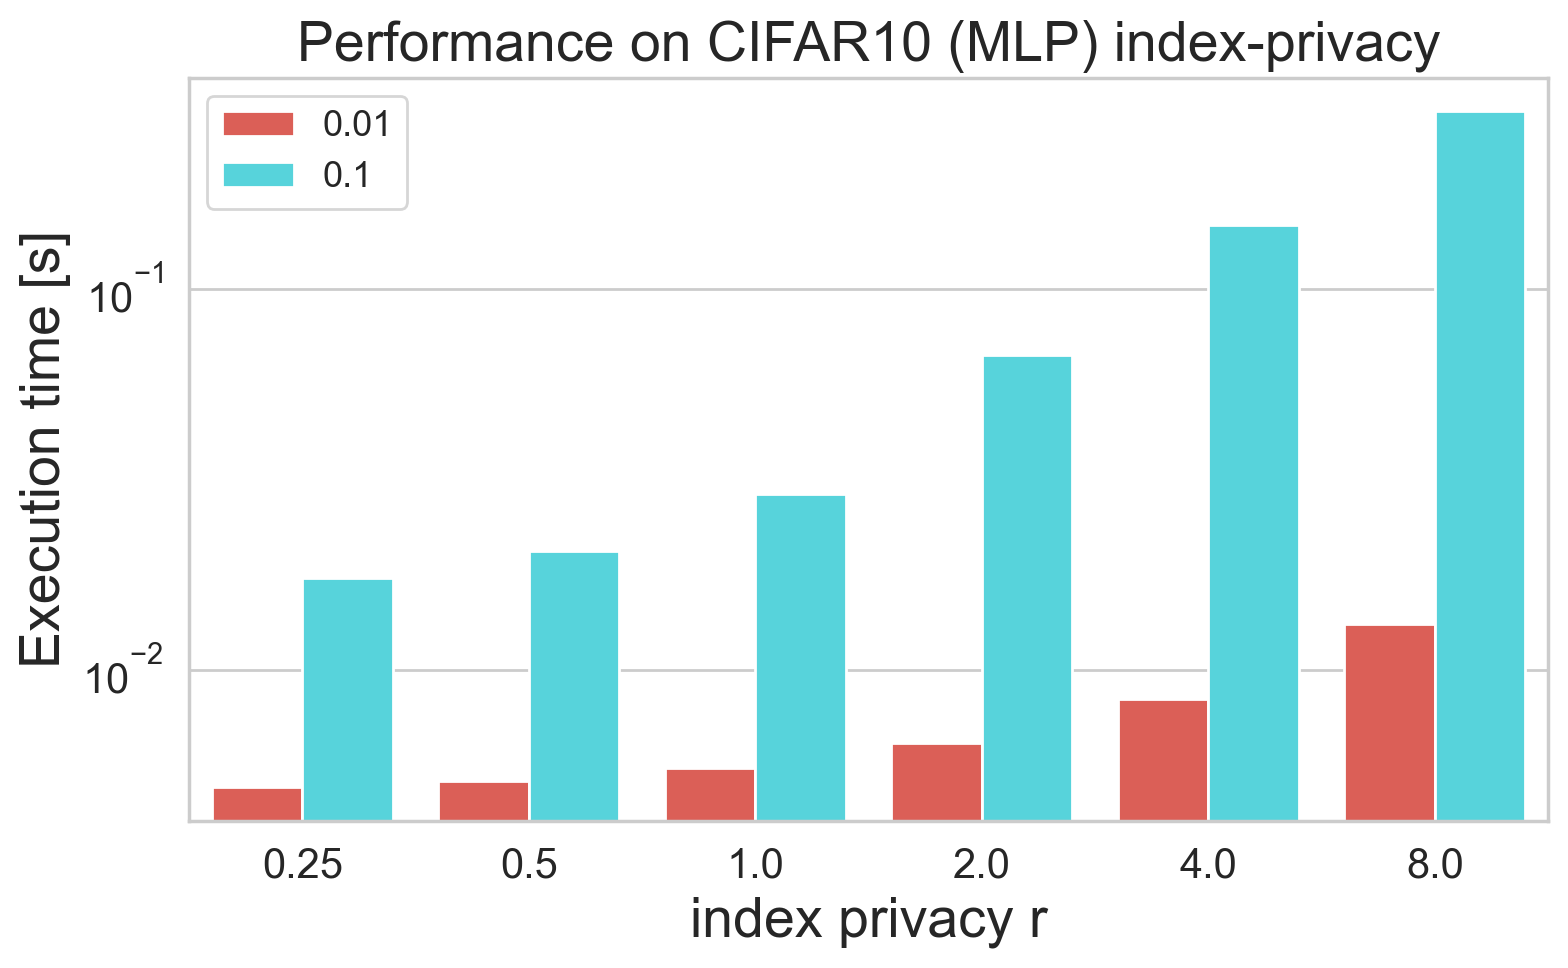

In [27]:
exp5_cifar10 = exp5[exp5['dataset'] == 'cifar10']
cifar10_by_index_privacy_r = exp5_cifar10.groupby(['alpha', 'index_privacy_r']).mean()
cifar10_by_index_privacy_r = cifar10_by_index_privacy_r.reset_index()
print(len(cifar10_by_index_privacy_r))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR10 (MLP) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = cifar10_by_index_privacy_r, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-cifar10-mlp-index-privacy.png")

8


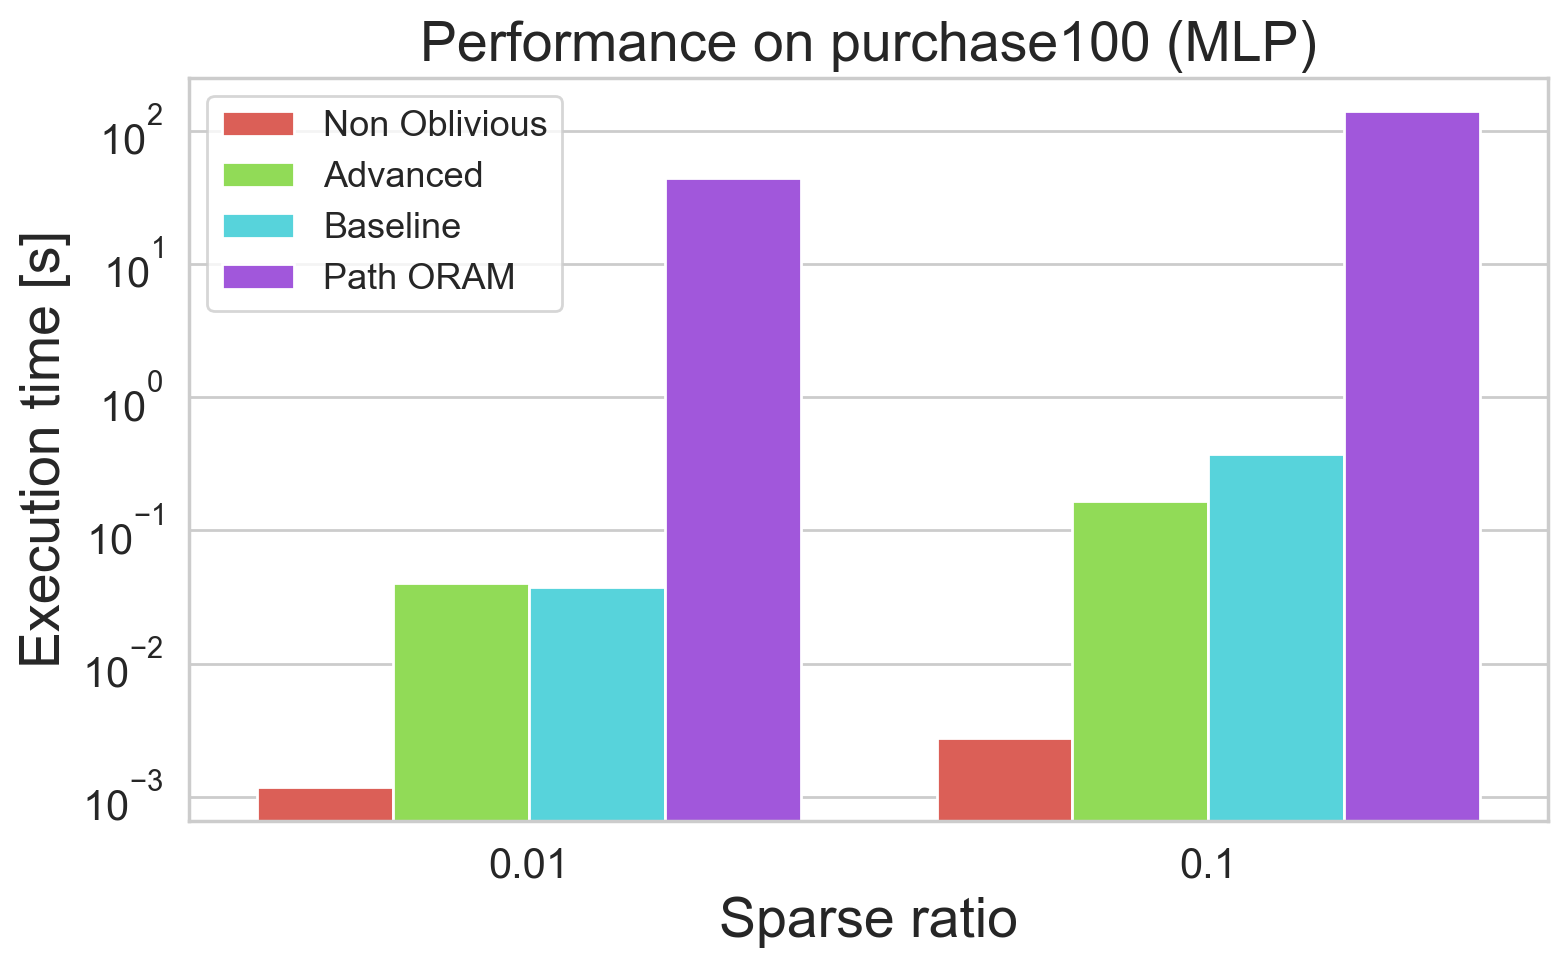

In [28]:
exp5_purchase100 = exp5[exp5['dataset'] == 'purchase100']
exp5_purchase100_without_index_privacy = exp5_purchase100[exp5_purchase100['index_privacy_r'].isna()]
exp5_purchase100_without_index_privacy = exp5_purchase100_without_index_privacy.groupby(['aggregation_alg', 'alpha']).mean()
exp5_purchase100_without_index_privacy = exp5_purchase100_without_index_privacy.reset_index()
print(len(exp5_purchase100_without_index_privacy))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on purchase100 (MLP)", fontsize=20)

sns.barplot(
    x = 'alpha', y = 'execution_time', hue = 'aggregation_alg', data = exp5_purchase100_without_index_privacy, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("Sparse ratio", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-purchase100.png")

12


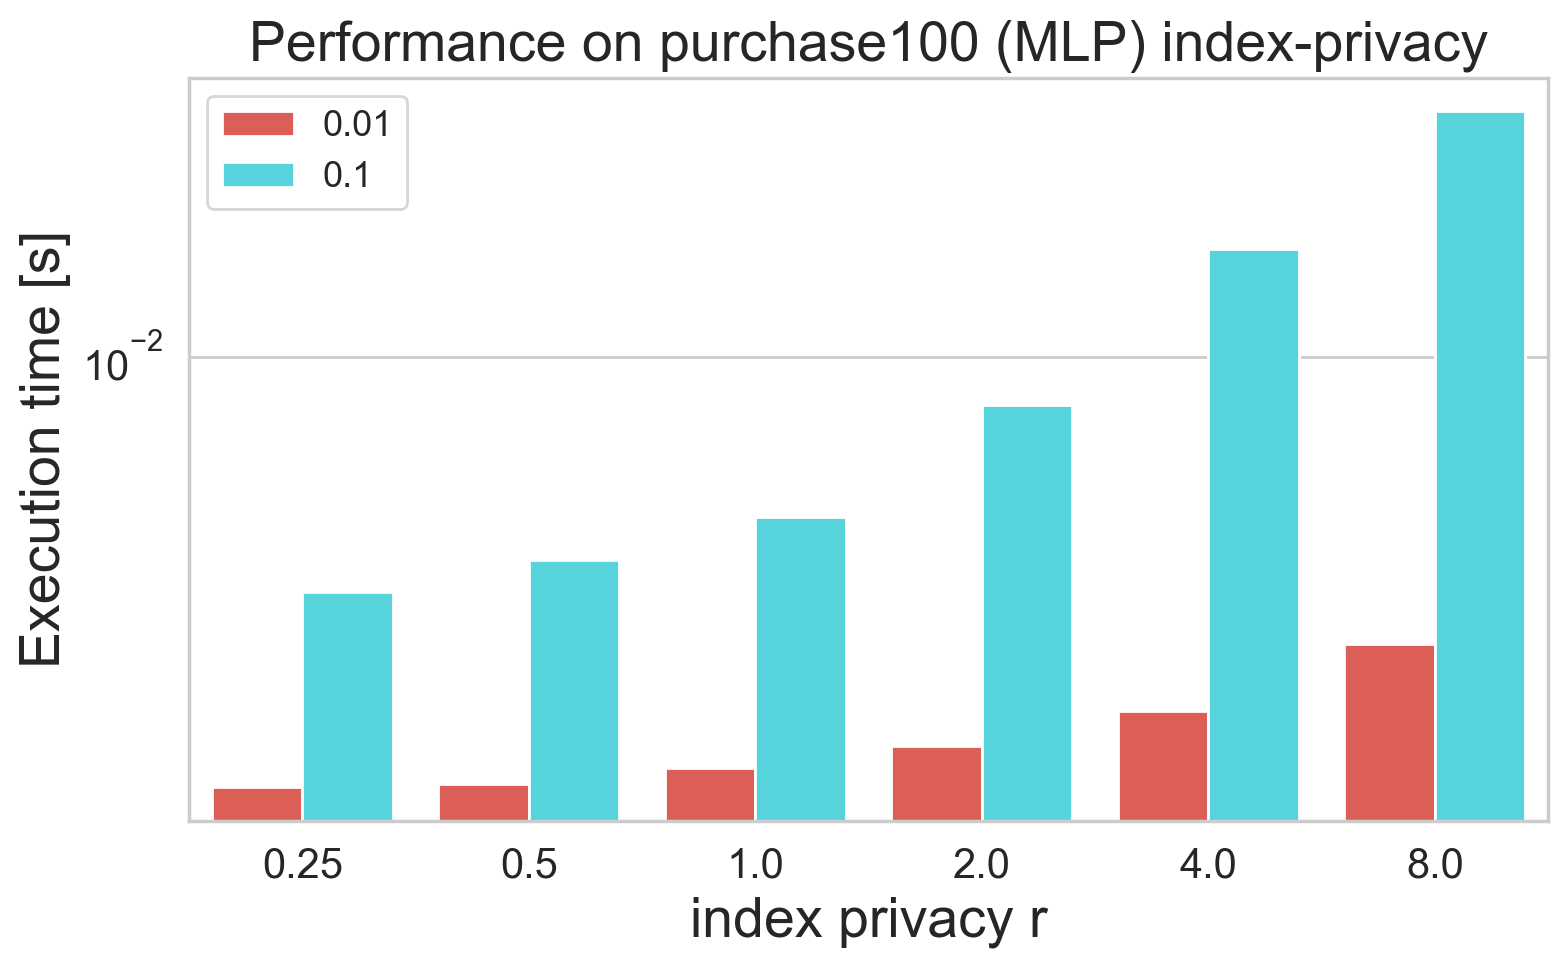

In [29]:
exp5_purchase100 = exp5[exp5['dataset'] == 'purchase100']
exp5_purchase100_by_index_privacy_r = exp5_purchase100.groupby(['alpha', 'index_privacy_r']).mean()
exp5_purchase100_by_index_privacy_r = exp5_purchase100_by_index_privacy_r.reset_index()
print(len(exp5_purchase100_by_index_privacy_r))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on purchase100 (MLP) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = exp5_purchase100_by_index_privacy_r, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-purchase100-mlp-index-privacy.png")

30


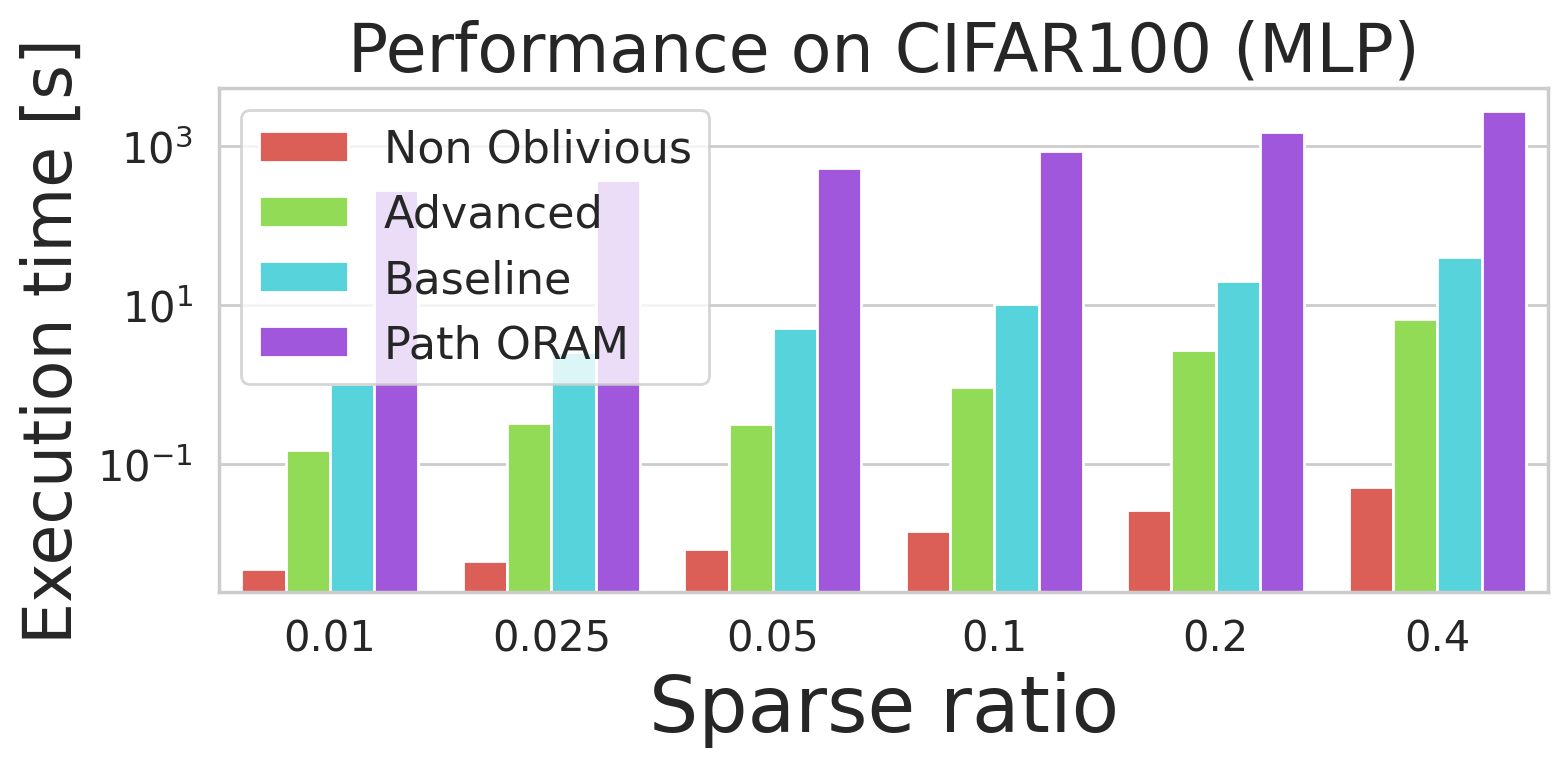

In [112]:
exp5_cifar100 = exp5[exp5['dataset'] == 'cifar100']
exp5_cifar100_without_index_privacy = exp5_cifar100[exp5_cifar100['index_privacy_r'].isna()]
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy.groupby(['aggregation_alg', 'alpha']).mean()
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy.reset_index()
print(len(exp5_cifar100_without_index_privacy))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR100 (MLP)", fontsize=24)

sns.barplot(
    x = 'alpha', y = 'execution_time', hue = 'aggregation_alg', data = exp5_cifar100_without_index_privacy, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=16)
ax.set_ylabel("Execution time [s]", fontsize=24)
ax.set_xlabel("Sparse ratio", fontsize=28)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-mnist-cifar100.png")

12


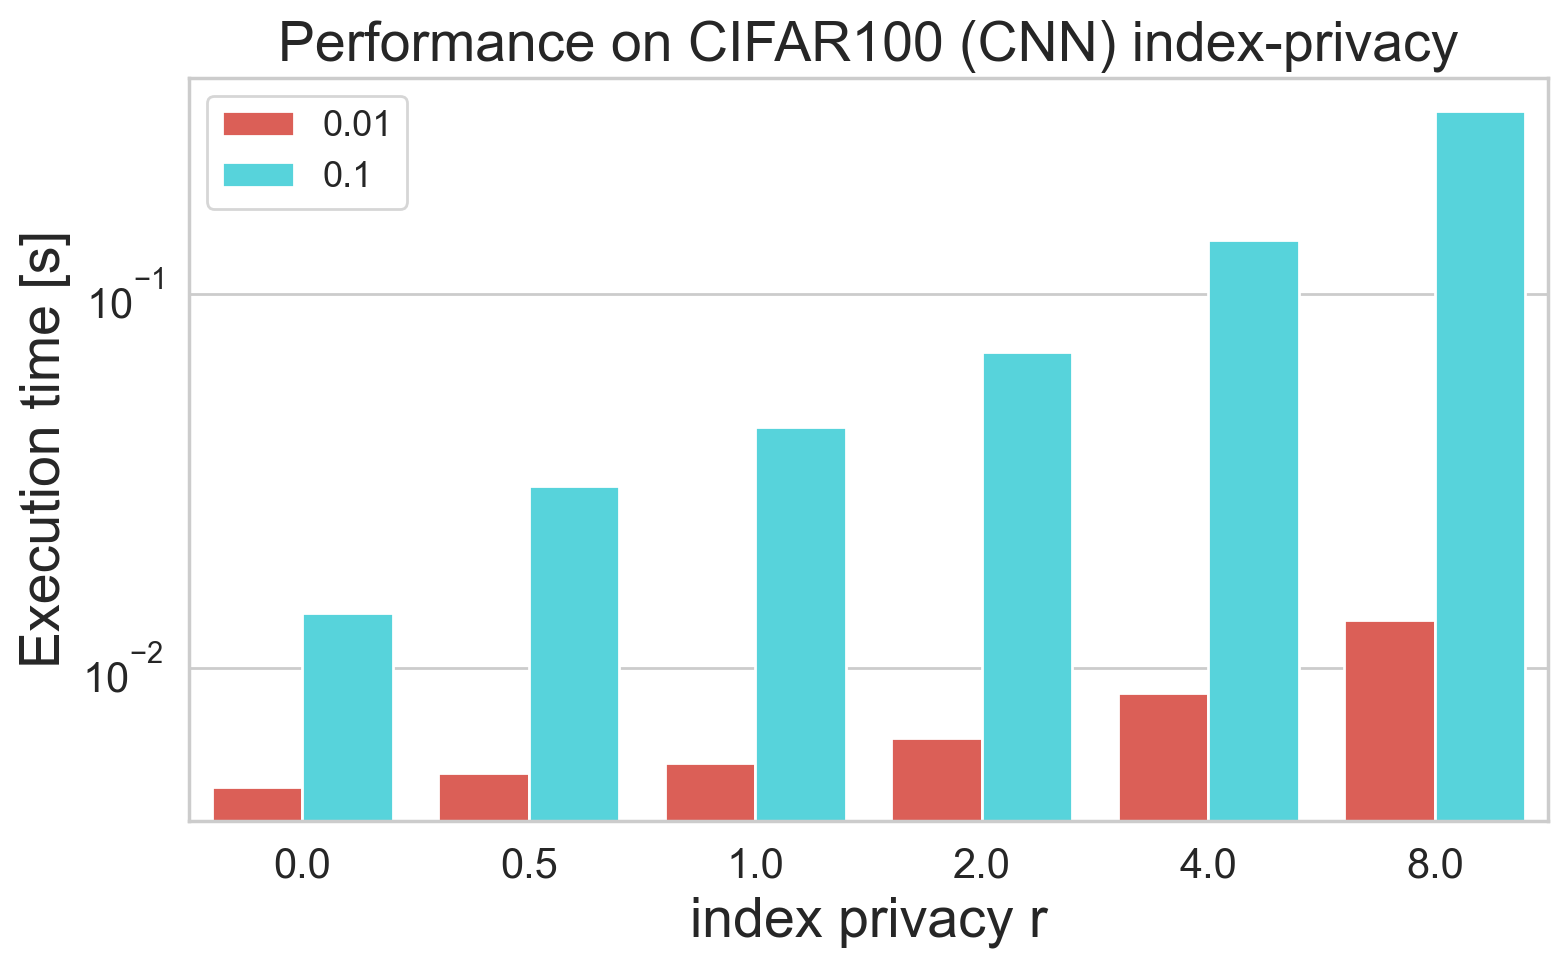

In [31]:
exp5_cifar100 = exp5[exp5['dataset'] == 'cifar100']
exp5_cifar100 = exp5_cifar100[exp5_cifar100['aggregation_alg'] == 'Non Oblivious']
exp5_cifar100_by_index_privacy_r = exp5_cifar100.groupby(['alpha', 'index_privacy_r']).mean()
exp5_cifar100_without_index_privacy = exp5_cifar100[exp5_cifar100['index_privacy_r'].isna()].groupby(['alpha']).mean()
exp5_cifar100_without_index_privacy['index_privacy_r'] = 0
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy.reset_index()
exp5_cifar100_without_index_privacy = exp5_cifar100_without_index_privacy[(exp5_cifar100_without_index_privacy['alpha'] == 0.01) | (exp5_cifar100_without_index_privacy['alpha'] == 0.1)]
exp5_cifar100_by_index_privacy_r = exp5_cifar100_by_index_privacy_r.reset_index()
exp5_cifar100_by_index_privacy_r = exp5_cifar100_by_index_privacy_r[exp5_cifar100_by_index_privacy_r['index_privacy_r'] > 0.25]

data = pd.concat([exp5_cifar100_by_index_privacy_r, exp5_cifar100_without_index_privacy], axis= 0)
print(len(data))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("Performance on CIFAR100 (CNN) index-privacy", fontsize=20)

sns.barplot(
    x = 'index_privacy_r', y = 'execution_time', hue = 'alpha', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=[0.01, 0.1])
ax.set_yscale('log')

ax.legend(fontsize=13)
ax.set_ylabel("Execution time [s]", fontsize=20)
ax.set_xlabel("index privacy r", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-cifar100-cnn-index-privacy.png")

## exp6
- protection

In [47]:
exp6 = pd.read_csv(exp_results_path / 'exp6.csv', header=None, names=exp6_names, index_col=None)
exp6

dataset  epochs  frac  num_users  num_of_label_k  random_num_label model  \
0      mnist       3   0.3        100               2             False   mlp   
1      mnist       3   0.3        100               2             False   mlp   
2      mnist       3   0.3        100               2             False   mlp   
3      mnist       3   0.3        100               2             False   mlp   
4      mnist       3   0.3        100               2             False   mlp   
..       ...     ...   ...        ...             ...               ...   ...   
199  cifar10       3   0.3        100               2             False   mlp   
200  cifar10       3   0.3        100               2             False   mlp   
201  cifar10       3   0.3        100               2             False   mlp   
202  cifar10       3   0.3        100               2             False   mlp   
203  cifar10       3   0.3        100               2             False   mlp   

     alpha      attack  fixed_inference_number  ...     protection  \
0     0.10          nn                       2  ...  index-privacy   
1     0.10          nn                       2  ...  index-privacy   
2     0.10  clustering                       2  ...  index-privacy   
3     0.10          nn                       2  ...  index-privacy   
4     0.10          nn                       2  ...  index-privacy   
..     ...         ...                     ...  ...            ...   
199   0.01          nn                       2  ...  index-privacy   
200   0.01  clustering                       2  ...  index-privacy   
201   0.01          nn                       2  ...  index-privacy   
202   0.01          nn                       2  ...  index-privacy   
203   0.01  clustering                       2  ...  index-privacy   

     index_privacy_r     dp epsilon  delta       all     top-1  \
0               0.25  False     NaN    NaN  0.985294  1.000000   
1               0.25  False     NaN    NaN  0.911765  1.000000   
2               0.25  False     NaN    NaN  0.397059  0.911765   
3               0.50  False     NaN    NaN  0.970588  1.000000   
4               0.50  False     NaN    NaN  0.779412  1.000000   
..               ...    ...     ...    ...       ...       ...   
199            32.00  False     NaN    NaN  0.035714  0.193548   
200            32.00  False     NaN    NaN  0.071429  0.370968   
201            64.00  False     NaN    NaN  0.035714  0.193548   
202            64.00  False     NaN    NaN  0.035714  0.209677   
203            64.00  False     NaN    NaN  0.017857  0.129032   

     missing_labels  num       timestamp  
0                 0   68  20220127193629  
1                 0   68  20220127194023  
2                 0   68  20220127194032  
3                 0   68  20220127194239  
4                 0   68  20220127194634  
..              ...  ...             ...  
199               6   62  20220202183526  
200               6   62  20220202183840  
201               6   62  20220202191225  
202               6   62  20220202200641  
203               6   62  20220202201015  

[204 rows x 23 columns]

36


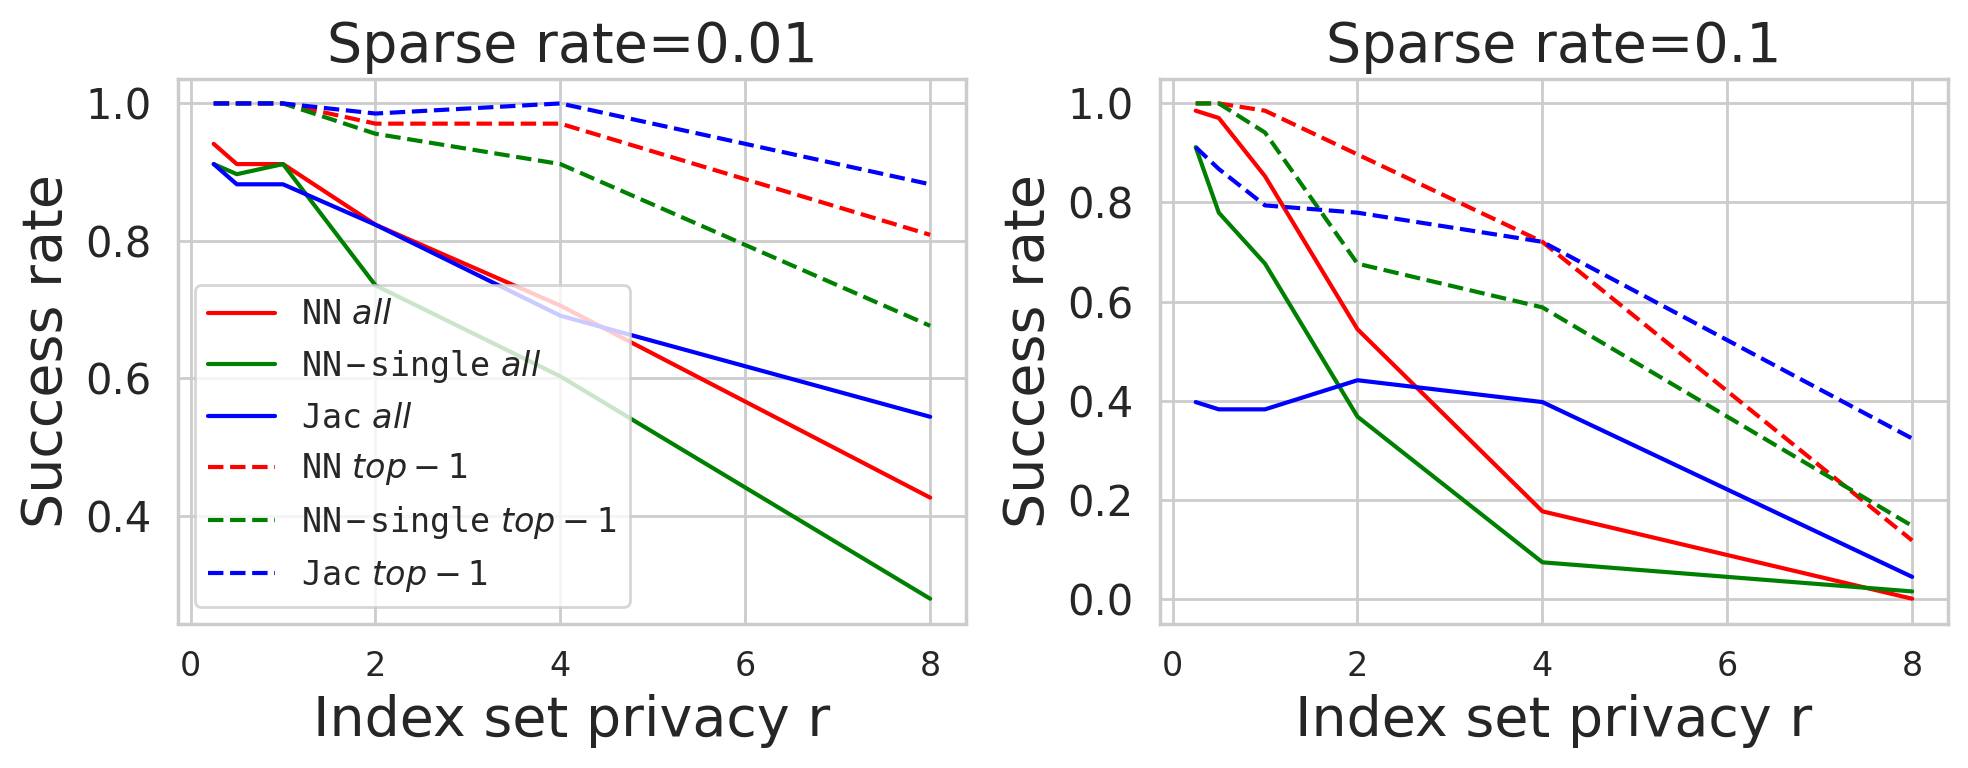

In [48]:
exp6_mnist = exp6[exp6['dataset'] == 'mnist']
exp6_mnist = exp6_mnist[exp6_mnist['model'] == 'mlp']
exp6_mnist = exp6_mnist[exp6_mnist['protection'] == 'index-privacy']
print(len(exp6_mnist))

exp6_mnist_001 = exp6_mnist[exp6_mnist['alpha'] == 0.01]
x = exp6_mnist_001['index_privacy_r'].unique()
nn_total = exp6_mnist_001[exp6_mnist_001['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_mnist_001[exp6_mnist_001['attack'] == 'clustering']

fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("Sparse rate=0.01", fontsize=20)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax1.legend(fontsize=12)
ax1.set_ylabel("Success rate", fontsize=20)
ax1.set_xlabel("Index set privacy r", fontsize=20)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=15)



ax2 = fig.add_subplot(1, 2, 2)

exp6_mnist_01 = exp6_mnist[exp6_mnist['alpha'] == 0.1]
x = exp6_mnist_01['index_privacy_r'].unique()
nn_total = exp6_mnist_01[exp6_mnist_01['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_mnist_01[exp6_mnist_01['attack'] == 'clustering']

ax2.set_title("Sparse rate=0.1", fontsize=20)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax2.legend().remove()
ax2.set_ylabel("Success rate", fontsize=20)
ax2.set_xlabel("Index set privacy r", fontsize=20)

ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "index-privacy-protection-mnist.png")

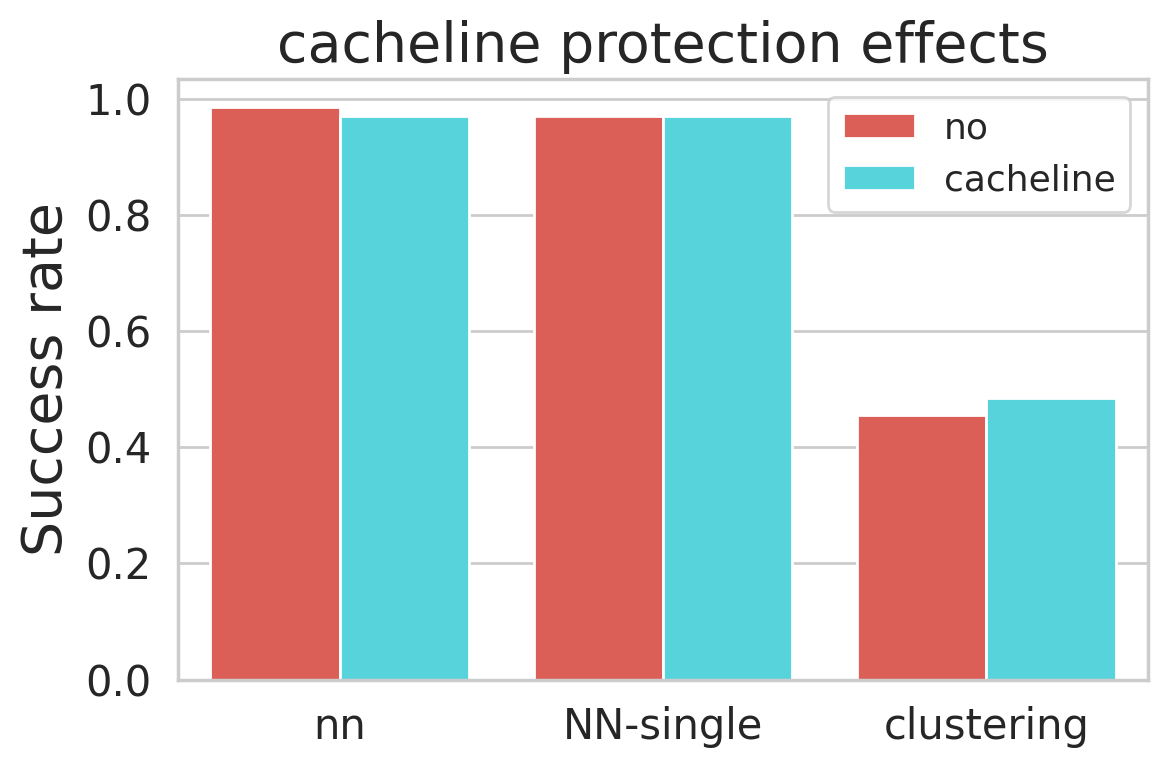

In [49]:
exp6_mnist = exp6[exp6['dataset'] == 'mnist']
exp6_mnist = exp6_mnist[exp6_mnist['model'] == 'mlp']
exp6_mnist = exp6_mnist[exp6_mnist['protection'] == 'cacheline']
exp6_mnist.loc[exp6_mnist['single_model'] == True, 'attack'] = 'NN-single'

exp1_mnist = exp1[exp1['dataset'] == 'mnist']
exp1_mnist = exp1_mnist[exp1_mnist['model'] == 'mlp']
exp1_mnist = exp1_mnist[exp1_mnist['num_of_label_k'] == 2]
exp1_mnist.insert(2, 'protection', 'no')
exp1_mnist.loc[exp1_mnist['single_model'] == True, 'attack'] = 'NN-single'

data = pd.concat([exp1_mnist, exp6_mnist], axis= 0)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("cacheline protection effects", fontsize=20)


sns.barplot(
    x = 'attack', y = 'all', hue = 'protection', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['no', 'cacheline'])

ax.legend(fontsize=13)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "cacheline-protection-mnist.png")

45


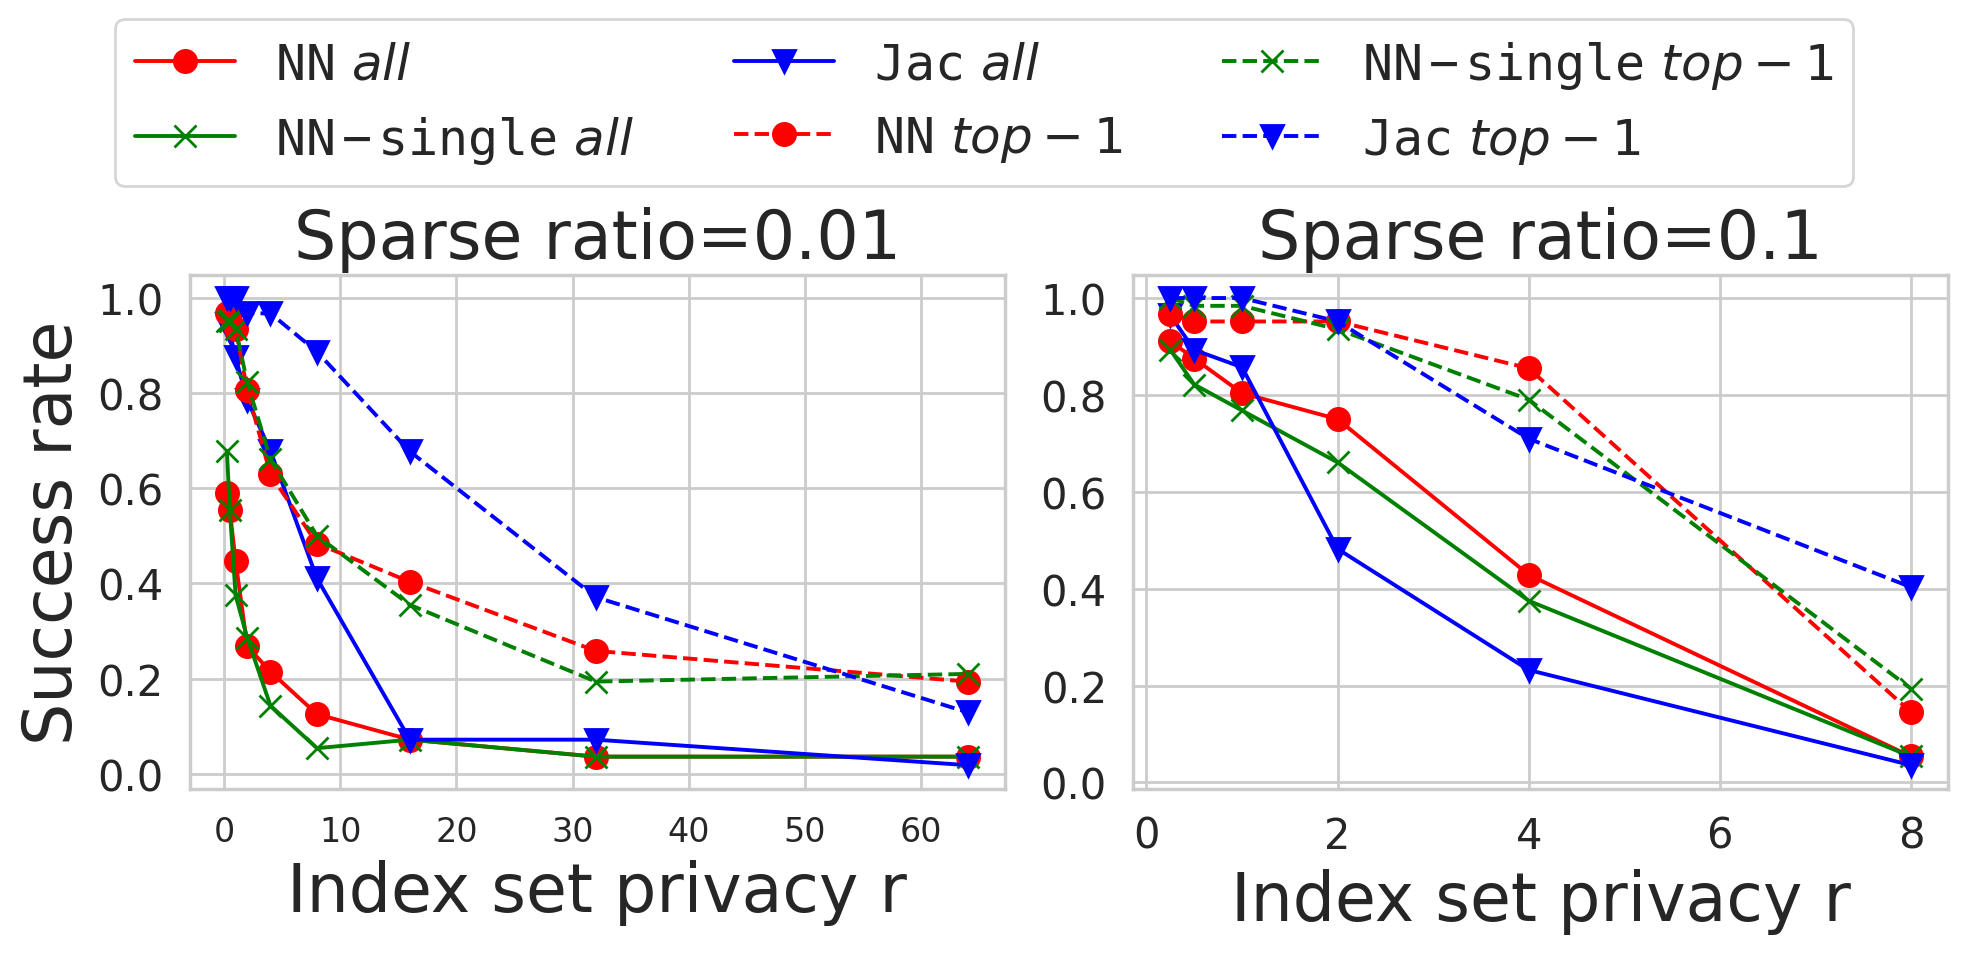

In [125]:
exp6_cifar10 = exp6[exp6['dataset'] == 'cifar10']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['model'] == 'mlp']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['protection'] == 'index-privacy']
print(len(exp6_cifar10))

exp6_cifar10_001 = exp6_cifar10[exp6_cifar10['alpha'] == 0.01]
x = exp6_cifar10_001['index_privacy_r'].unique()
nn_total = exp6_cifar10_001[exp6_cifar10_001['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_cifar10_001[exp6_cifar10_001['attack'] == 'clustering']

fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("Sparse ratio=0.01", fontsize=24)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=1.4, marker="o", markersize=8)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=1.4, marker="v", markersize=8)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=1.4, marker="o", markersize=8)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=1.4, marker="v", markersize=8)

ax1.legend().remove()
ax1.set_ylabel("Success rate", fontsize=24)
ax1.set_xlabel("Index set privacy r", fontsize=24)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=15)

handles, labels = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(1, 2, 2)

exp6_cifar10_01 = exp6_cifar10[exp6_cifar10['alpha'] == 0.1]
x = exp6_cifar10_01['index_privacy_r'].unique()
nn_total = exp6_cifar10_01[exp6_cifar10_01['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_cifar10_01[exp6_cifar10_01['attack'] == 'clustering']

ax2.set_title("Sparse ratio=0.1", fontsize=24)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color, lw=1.4, marker="o", markersize=8)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color, lw=1.4, marker="v", markersize=8)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color, lw=1.4, marker="o", markersize=8)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color, lw=1.4, marker="x", markersize=8)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color, lw=1.4, marker="v", markersize=8)

ax2.legend().remove()
ax2.set_ylabel("", fontsize=0)
ax2.set_xlabel("Index set privacy r", fontsize=24)

ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.22), fontsize=18)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "index-privacy-cifar10.png", bbox_inches = "tight")

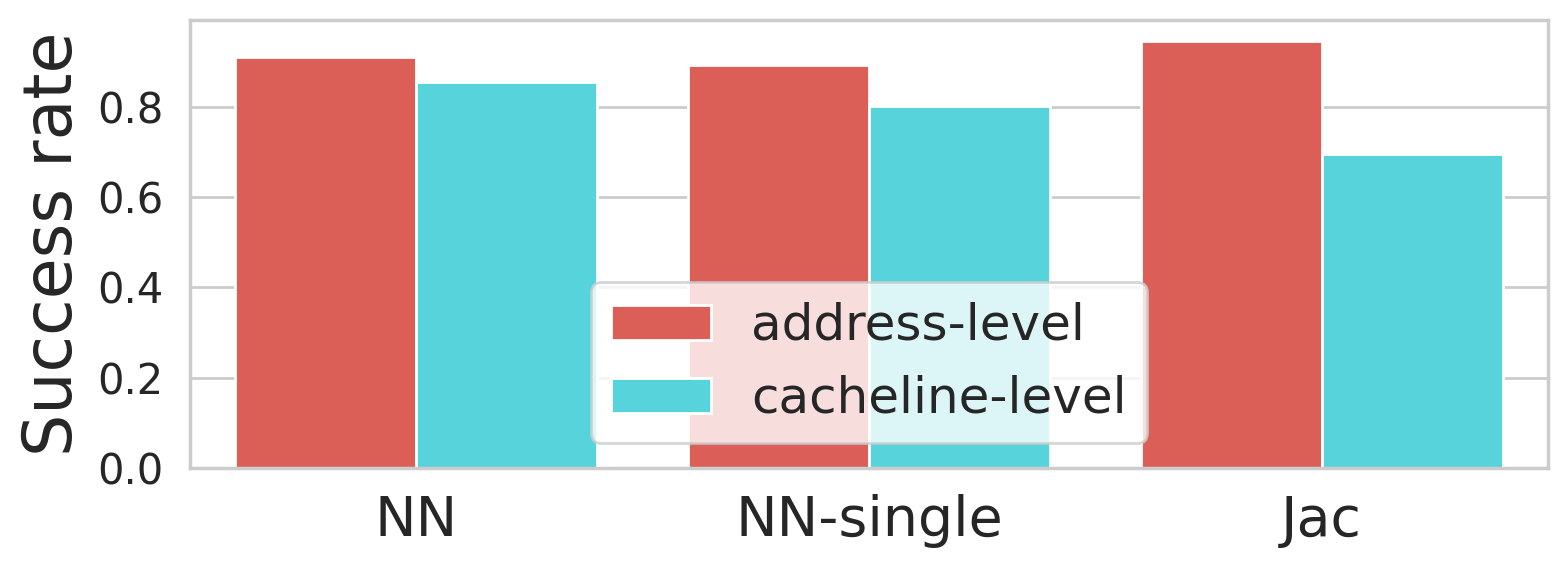

In [81]:
exp6_cifar10 = exp6[exp6['dataset'] == 'cifar10']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['model'] == 'mlp']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['protection'] == 'cacheline']
exp6_cifar10.loc[exp6_cifar10['single_model'] == True, 'attack'] = 'NN-single'
exp6_cifar10.loc[exp6_cifar10['attack'] == 'nn', 'attack'] = 'NN'
exp6_cifar10.loc[exp6_cifar10['protection'] == 'cacheline', 'protection'] = 'cacheline-level'
exp6_cifar10.loc[exp6_cifar10['attack'] == 'clustering', 'attack'] = 'Jac'

exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10 = exp1_cifar10[exp1_cifar10['model'] == 'mlp']
exp1_cifar10 = exp1_cifar10[exp1_cifar10['num_of_label_k'] == 2]
exp1_cifar10.insert(2, 'protection', 'address-level')
exp1_cifar10.loc[exp1_cifar10['single_model'] == True, 'attack'] = 'NN-single'
exp1_cifar10.loc[exp1_cifar10['attack'] == 'nn', 'attack'] = 'NN'

exp1_cifar10.loc[exp1_cifar10['attack'] == 'clustering', 'attack'] = 'Jac'

data = pd.concat([exp1_cifar10, exp6_cifar10], axis= 0)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(8, 3))
ax = fig.add_subplot(1, 1, 1)

# ax.set_title("cacheline protection effects", fontsize=24)


sns.barplot(
    x = 'attack', y = 'all', hue = 'protection', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['address-level', 'cacheline-level'])

ax.legend(fontsize=18, loc='lower center')
ax.set_ylabel("Success rate", fontsize=24)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "cacheline-protection-cifar10.png")

36


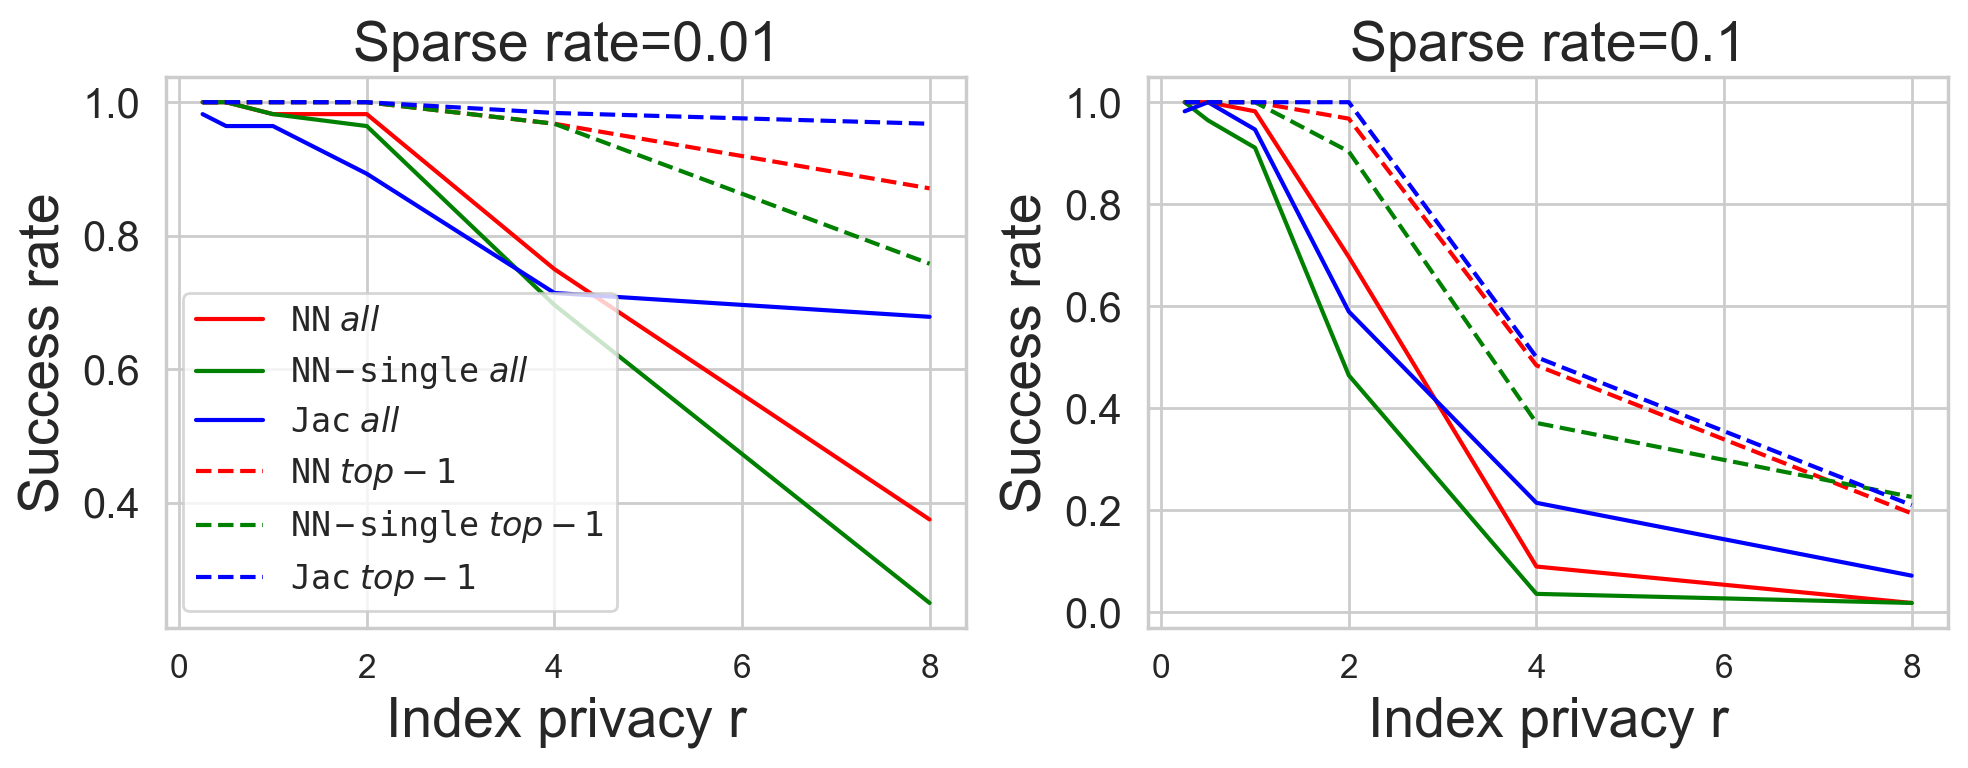

In [37]:
exp6_cifar10 = exp6[exp6['dataset'] == 'cifar10']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['model'] == 'cnn']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['protection'] == 'index-privacy']
print(len(exp6_cifar10))

exp6_cifar10_001 = exp6_cifar10[exp6_cifar10['alpha'] == 0.01]
x = exp6_cifar10_001['index_privacy_r'].unique()
nn_total = exp6_cifar10_001[exp6_cifar10_001['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_cifar10_001[exp6_cifar10_001['attack'] == 'clustering']

fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("Sparse rate=0.01", fontsize=20)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax1.legend(fontsize=12)
ax1.set_ylabel("Success rate", fontsize=20)
ax1.set_xlabel("Index privacy r", fontsize=20)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=15)



ax2 = fig.add_subplot(1, 2, 2)

exp6_cifar10_01 = exp6_cifar10[exp6_cifar10['alpha'] == 0.1]
x = exp6_cifar10_01['index_privacy_r'].unique()
nn_total = exp6_cifar10_01[exp6_cifar10_01['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_cifar10_01[exp6_cifar10_01['attack'] == 'clustering']

ax2.set_title("Sparse rate=0.1", fontsize=20)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax2.legend().remove()
ax2.set_ylabel("Success rate", fontsize=20)
ax2.set_xlabel("Index privacy r", fontsize=20)

ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "index-privacy-cifar10-cnn.png")

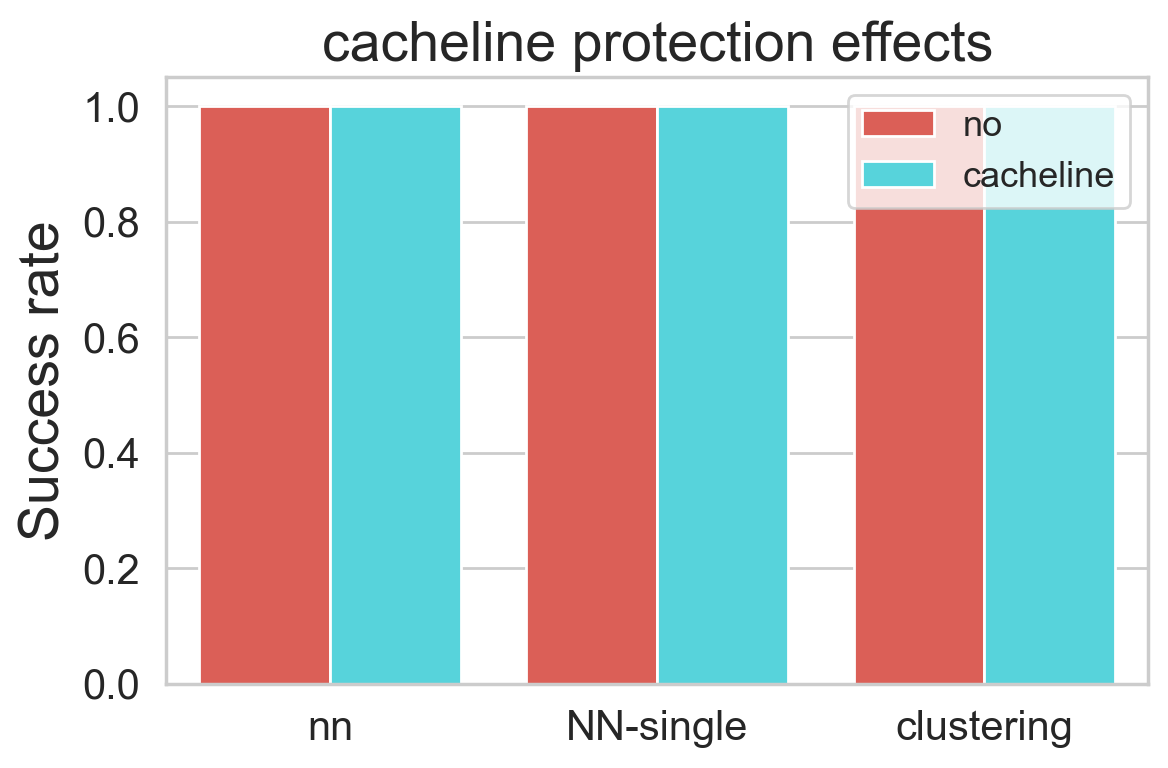

In [38]:
exp6_cifar10 = exp6[exp6['dataset'] == 'cifar10']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['model'] == 'cnn']
exp6_cifar10 = exp6_cifar10[exp6_cifar10['protection'] == 'cacheline']
exp6_cifar10.loc[exp6_cifar10['single_model'] == True, 'attack'] = 'NN-single'

exp1_cifar10 = exp1[exp1['dataset'] == 'cifar10']
exp1_cifar10 = exp1_cifar10[exp1_cifar10['model'] == 'cnn']
exp1_cifar10 = exp1_cifar10[exp1_cifar10['num_of_label_k'] == 2]
exp1_cifar10.insert(2, 'protection', 'no')
exp1_cifar10.loc[exp1_cifar10['single_model'] == True, 'attack'] = 'NN-single'

data = pd.concat([exp1_cifar10, exp6_cifar10], axis= 0)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("cacheline protection effects", fontsize=20)


sns.barplot(
    x = 'attack', y = 'all', hue = 'protection', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['no', 'cacheline'])

ax.legend(fontsize=13)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "cacheline-protection-cnn-cifar10.png")

36


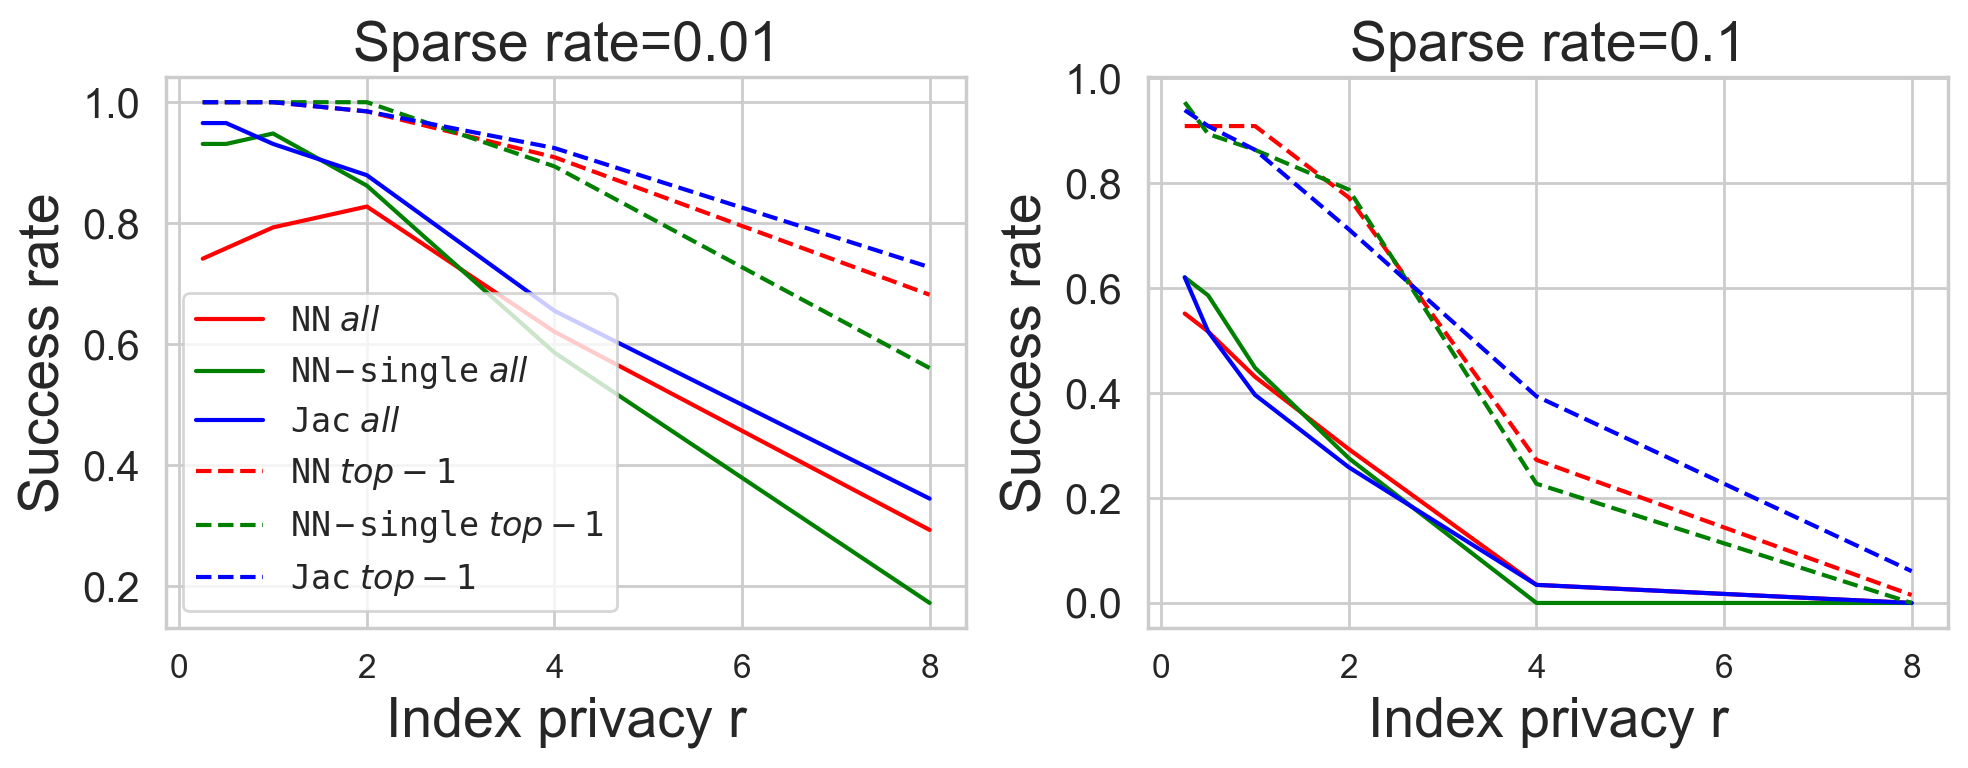

In [39]:
exp6_purchase100 = exp6[exp6['dataset'] == 'purchase100']
exp6_purchase100 = exp6_purchase100[exp6_purchase100['model'] == 'mlp']
exp6_purchase100 = exp6_purchase100[exp6_purchase100['protection'] == 'index-privacy']
print(len(exp6_purchase100))

exp6_purchase100_001 = exp6_purchase100[exp6_purchase100['alpha'] == 0.01]
x = exp6_purchase100_001['index_privacy_r'].unique()
nn_total = exp6_purchase100_001[exp6_purchase100_001['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_purchase100_001[exp6_purchase100_001['attack'] == 'clustering']

fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("Sparse rate=0.01", fontsize=20)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax1.legend(fontsize=12)
ax1.set_ylabel("Success rate", fontsize=20)
ax1.set_xlabel("Index privacy r", fontsize=20)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=15)



ax2 = fig.add_subplot(1, 2, 2)

exp6_purchase100_01 = exp6_purchase100[exp6_purchase100['alpha'] == 0.1]
x = exp6_purchase100_01['index_privacy_r'].unique()
nn_total = exp6_purchase100_01[exp6_purchase100_01['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_purchase100_01[exp6_purchase100_01['attack'] == 'clustering']

ax2.set_title("Sparse rate=0.1", fontsize=20)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax2.legend().remove()
ax2.set_ylabel("Success rate", fontsize=20)
ax2.set_xlabel("Index privacy r", fontsize=20)

ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "index-privacy-purchase100.png")

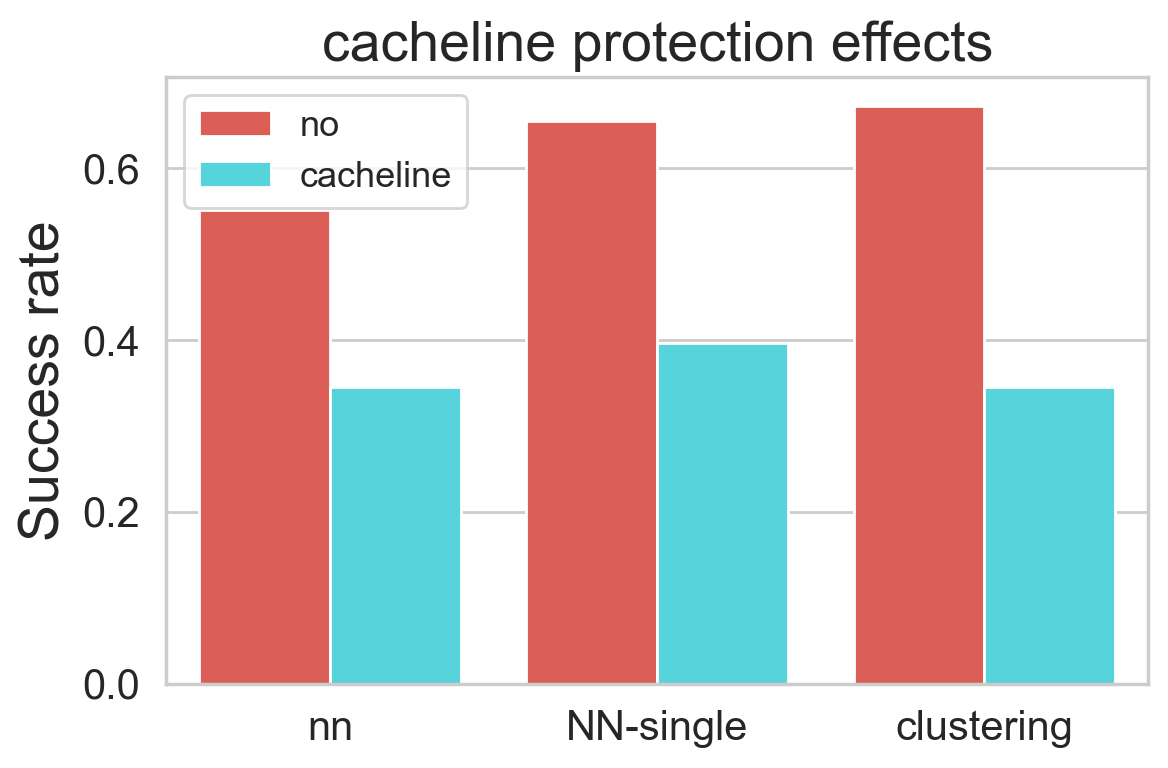

In [40]:
exp6_purchase100 = exp6[exp6['dataset'] == 'purchase100']
exp6_purchase100 = exp6_purchase100[exp6_purchase100['model'] == 'mlp']
exp6_purchase100 = exp6_purchase100[exp6_purchase100['protection'] == 'cacheline']
exp6_purchase100.loc[exp6_purchase100['single_model'] == True, 'attack'] = 'NN-single'

exp1_purchase100 = exp1[exp1['dataset'] == 'purchase100']
exp1_purchase100 = exp1_purchase100[exp1_purchase100['model'] == 'mlp']
exp1_purchase100 = exp1_purchase100[exp1_purchase100['num_of_label_k'] == 2]
exp1_purchase100.insert(2, 'protection', 'no')
exp1_purchase100.loc[exp1_purchase100['single_model'] == True, 'attack'] = 'NN-single'

data = pd.concat([exp1_purchase100, exp6_purchase100], axis= 0)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("cacheline protection effects", fontsize=20)


sns.barplot(
    x = 'attack', y = 'all', hue = 'protection', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['no', 'cacheline'])

ax.legend(fontsize=13)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "cacheline-protection-mlp-purchase100.png")

36


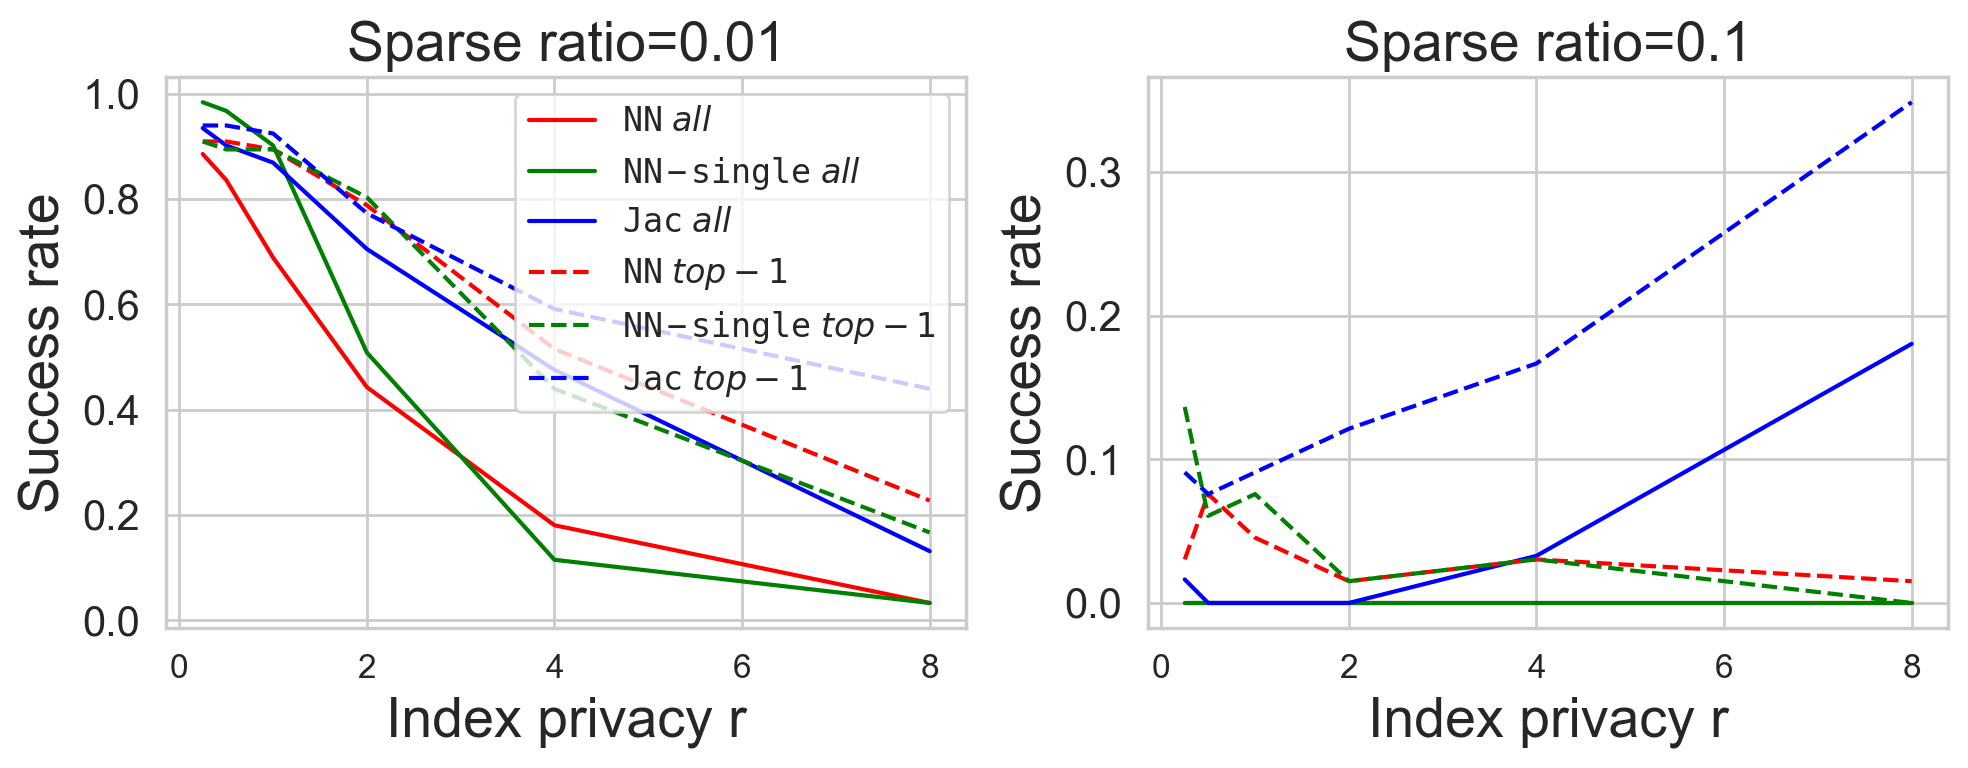

In [41]:
exp6_cifar100 = exp6[exp6['dataset'] == 'cifar100']
exp6_cifar100 = exp6_cifar100[exp6_cifar100['model'] == 'cnn']
exp6_cifar100 = exp6_cifar100[exp6_cifar100['protection'] == 'index-privacy']
print(len(exp6_cifar100))

exp6_cifar100_001 = exp6_cifar100[exp6_cifar100['alpha'] == 0.01]
x = exp6_cifar100_001['index_privacy_r'].unique()
nn_total = exp6_cifar100_001[exp6_cifar100_001['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_cifar100_001[exp6_cifar100_001['attack'] == 'clustering']

fig = plt.figure(dpi=200, figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("Sparse ratio=0.01", fontsize=20)

ax1.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax1.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax1.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax1.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax1.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax1.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax1.legend(fontsize=12)
ax1.set_ylabel("Success rate", fontsize=20)
ax1.set_xlabel("Index privacy r", fontsize=20)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=15)



ax2 = fig.add_subplot(1, 2, 2)

exp6_cifar100_01 = exp6_cifar100[exp6_cifar100['alpha'] == 0.1]
x = exp6_cifar100_01['index_privacy_r'].unique()
nn_total = exp6_cifar100_01[exp6_cifar100_01['attack'] == 'nn']
nn = nn_total[nn_total['single_model']==False]
nn_single = nn_total[nn_total['single_model']==True]
clustering = exp6_cifar100_01[exp6_cifar100_01['attack'] == 'clustering']

ax2.set_title("Sparse ratio=0.1", fontsize=20)

ax2.plot(x, nn['all'], label=legends['nn-all'], color=nn_color)
ax2.plot(x, nn_single['all'], label=legends['nn-single-all'], color=nn_single_color)
ax2.plot(x, clustering['all'], label=legends['clustering-all'], color=clustering_color)

ax2.plot(x, nn['top-1'], label=legends['nn-top-1'], ls='--', color=nn_color)
ax2.plot(x, nn_single['top-1'], label=legends['nn-single-top-1'], ls='--', color=nn_single_color)
ax2.plot(x, clustering['top-1'], label=legends['clustering-top-1'], ls='--', color=clustering_color)

ax2.legend().remove()
ax2.set_ylabel("Success rate", fontsize=20)
ax2.set_xlabel("Index privacy r", fontsize=20)

ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "index-privacy-cifar100.png")

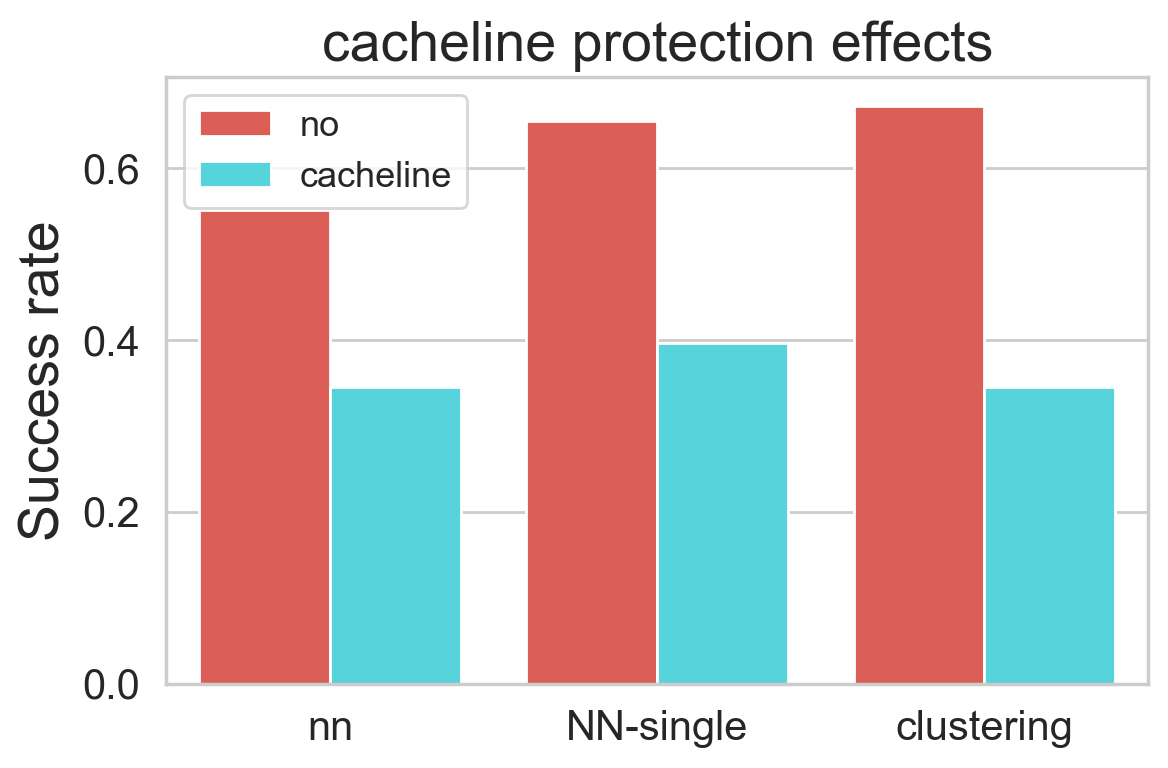

In [42]:
exp6_cifar100 = exp6[exp6['dataset'] == 'cifar100']
exp6_cifar100 = exp6_cifar100[exp6_cifar100['model'] == 'cnn']
exp6_cifar100 = exp6_cifar100[exp6_cifar100['protection'] == 'cacheline']
exp6_cifar100.loc[exp6_cifar100['single_model'] == True, 'attack'] = 'NN-single'

exp1_cifar100 = exp1[exp1['dataset'] == 'cifar100']
exp1_cifar100 = exp1_cifar100[exp1_cifar100['model'] == 'cnn']
exp1_cifar100 = exp1_cifar100[exp1_cifar100['num_of_label_k'] == 2]
exp1_cifar100.insert(2, 'protection', 'no')
exp1_cifar100.loc[exp1_cifar100['single_model'] == True, 'attack'] = 'NN-single'

data = pd.concat([exp1_purchase100, exp6_purchase100], axis= 0)

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("cacheline protection effects", fontsize=20)


sns.barplot(
    x = 'attack', y = 'all', hue = 'protection', data = data, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['no', 'cacheline'])

ax.legend(fontsize=13)
ax.set_ylabel("Success rate", fontsize=20)
ax.set_xlabel("", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "cacheline-protection-cnn-cifar100.png")

## exp7
- perform on artificial data

In [94]:
exp7_results_path = pathlib.Path('../secure_aggregation/results')
li = []
for filename in exp7_results_path.glob('*.txt'):
    df = pd.read_csv(filename, index_col=None, header=0, names=exp7_names)
    li.append(df)
exp7 = pd.concat(li, axis=0, ignore_index=True)
exp7['algorithm'] = exp7['algorithm'].replace('\[\d\]: |Avg w\/o \[\d\] \(\d trial\): ', '', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('path_oram', 'Path ORAM', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('non_oblivious', 'Non Oblivious', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('advanced', 'Advanced', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('baseline', 'Baseline', regex=True)
exp7['algorithm'] = exp7['algorithm'].replace('index_set_privacy_r_10', 'Index Set Privacy (r=10)', regex=True)

exp7 = exp7[exp7['num_of_parameters'] >= 10000]
exp7

algorithm  num_of_parameters  num_of_sparse_parameters  \
0             hoge             500000                      5000   
1             hoge             500000                      5000   
2             hoge             500000                      5000   
3             hoge             500000                      5000   
4         Baseline             100000                      1000   
..             ...                ...                       ...   
224       Baseline            5000000                     50000   
225       Baseline            5000000                     50000   
226  Non Oblivious            5000000                     50000   
227  Non Oblivious            5000000                     50000   
228  Non Oblivious            5000000                     50000   

     num_of_clients      load  decryption   aggregation         total  
0               100  0.013866    0.015652      0.917505      0.974061  
1               100  0.002183    0.003952      0.829656      0.842999  
2               100  0.001943    0.003802      0.841561      0.854184  
3               100  0.002063    0.003877      0.835609      0.848592  
4               100  0.003136    0.003594      0.817340      0.830200  
..              ...       ...         ...           ...           ...  
224             100  0.148286    0.154484  35984.769531  35985.332031  
225             100       NaN         NaN           NaN           NaN  
226             100  0.143221    0.155898      0.340398      0.902921  
227             100  0.144382    0.155917      0.354479      0.837795  
228             100  0.144382    0.155917      0.354479      0.837795  

[203 rows x 8 columns]

47


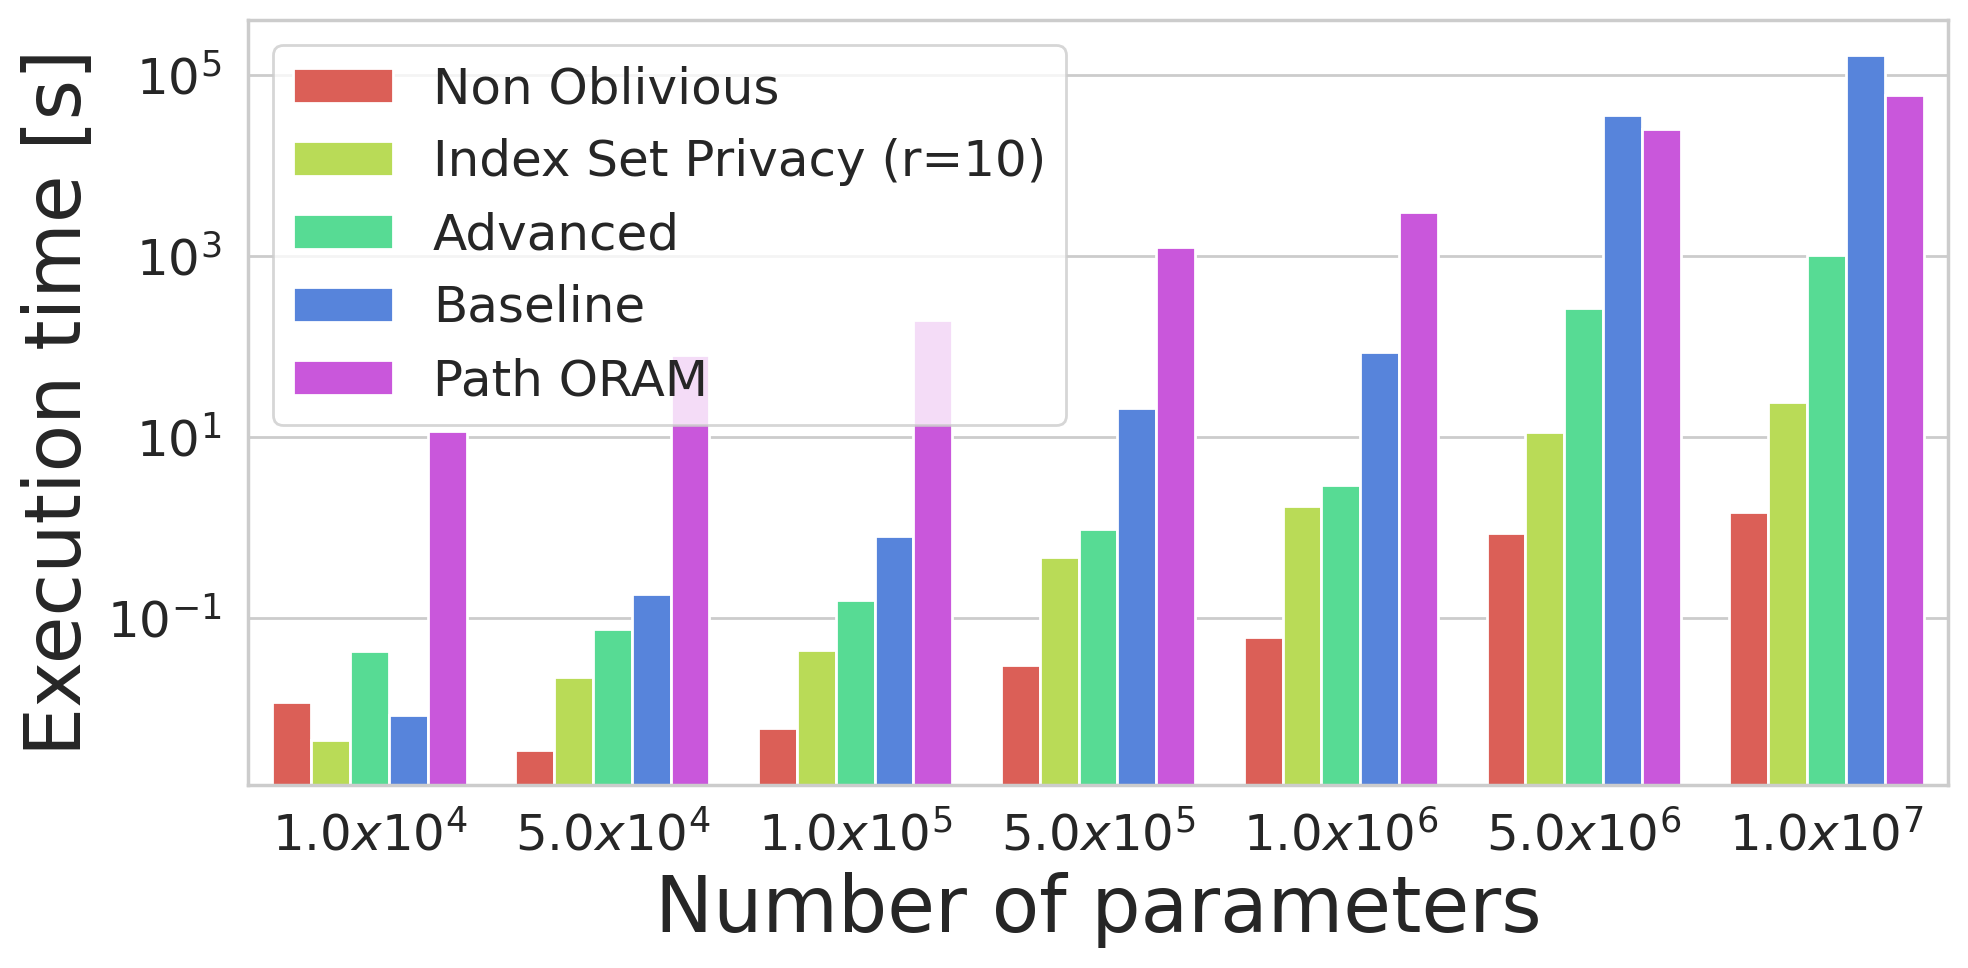

In [102]:
exp7_aggregated = exp7.groupby(['algorithm', 'num_of_parameters', 'num_of_sparse_parameters', 'num_of_clients']).mean()
exp7_aggregated = exp7_aggregated.reset_index()
print(len(exp7_aggregated))

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig = plt.figure(dpi=200, figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# ax.set_title("alpha=0.01, n=100", fontsize=24)

sns.barplot(
    x = 'num_of_parameters', y = 'total', hue = 'algorithm', data = exp7_aggregated, 
    palette = 'hls', capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = None, ax=ax,
    hue_order=['Non Oblivious', 'Index Set Privacy (r=10)', 'Advanced', 'Baseline', 'Path ORAM'])
ax.set_yscale('log')

ax.legend(fontsize=18)
ax.set_ylabel("Execution time [s]", fontsize=28)
ax.set_xlabel("Number of parameters", fontsize=28)
ax.tick_params(axis='x', labelsize=18)
ax.set_xticklabels([r'$1.0x10^4$','$5.0x10^4$', '$1.0x10^5$', '$5.0x10^5$', '$1.0x10^6$', '$5.0x10^6$', '$1.0x10^7$'])
ax.tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()

fig.savefig(img_path / "oblivious-performances-artificial-data.png")

In [45]:
ax.set_xticks

<bound method _AxesBase.set_xticks of <AxesSubplot:title={'center':'Performance on various parameters sparse ratio=0.01'}, xlabel='Number of parameters', ylabel='Execution time [s]'>>